> edit

- GConvGRU
- DCRNN
- GConvLSTM
- MPNNLSTM
- TGCN
- EvolveGCNO
- GCLSTM
- LRGCN
- EvolveGCNH
- DyGrEncoder

# 교수님 설정(수정 안 한 것)

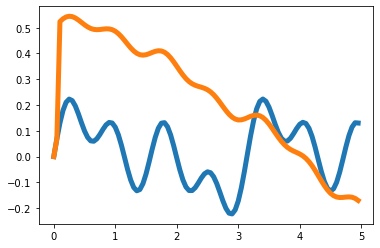

In [34]:
T = 100
t = np.arange(T)/T * 5

x = 0.1*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [ ]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [ ]:
dataset_DCRNN = loader1.get_dataset(lags=1)

In [ ]:
mindex = [[np.array(list(range(20,35)))],random.sample(range(0, T), int(T*0.5))]
dataset_miss_DCRNN = itstgcn.miss(dataset_DCRNN,mindex,mtype='block')

In [ ]:
dataset_padded_DCRNN = itstgcn.padding(dataset_miss_DCRNN,interpolation_method='linear')

In [ ]:
lrnr_DCRNN = itstgcn.StgcnLearner(dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN.learn(filters=1,epoch=10,lr=0.01,RecurrentGCN='GConvLSTM')

In [ ]:
evtor_DCRNN = Eval_csy(lrnr_DCRNN,dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN2 = itstgcn.ITStgcnLearner(dataset_padded_DCRNN)

In [ ]:
lrnr_DCRNN2.learn(filters=1,epoch=10,lr=0.01,RecurrentGCN='GConvLSTM')

---


# 초기 설정(수정 안 한 것)

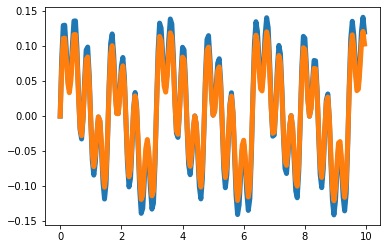

In [29]:
T = 200
t = np.arange(T)/T * 10
x = 0.1*np.sin(2*t)+0.2*np.sin(4*t)+0.1*np.sin(8*t)+0.2*np.sin(16*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
eps_y  = np.random.normal(size=T)*0
x = x*0.35
y = y*0.3
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}
_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1],[1,0]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}
df1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

In [ ]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [ ]:
dataset_GConvLSTM = loader1.get_dataset(lags=1)

In [ ]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(100,120)))]]
dataset_miss_GConvLSTM = itstgcn.miss(dataset_GConvLSTM,mindex,mtype='block')

In [ ]:
dataset_padded_cubic_GConvLSTM = itstgcn.padding(dataset_miss_GConvLSTM,interpolation_method='cubic')

In [ ]:
lrnr_GConvLSTM = itstgcn.StgcnLearner(dataset_padded_cubic_GConvLSTM)

In [ ]:
lrnr_GConvLSTM.learn(filters=8,epoch=50,RecurrentGCN='GConvLSTM')

---

# import

In [3]:
import itstgcn 
import torch
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import random

In [6]:
class Eval_csy:
    def __init__(self,learner,train_dataset):
        self.learner = learner
        # self.learner.model.eval()
        try:self.learner.model.eval()
        except:pass
        self.train_dataset = train_dataset
        self.lags = self.learner.lags
        rslt_tr = self.learner(self.train_dataset) 
        self.X_tr = rslt_tr['X']
        self.y_tr = rslt_tr['y']
        self.f_tr = torch.concat([self.train_dataset[0].x.T,self.y_tr],axis=0).float()
        self.yhat_tr = rslt_tr['yhat']
        self.fhat_tr = torch.concat([self.train_dataset[0].x.T,self.yhat_tr],axis=0).float()

In [7]:
import pickle
import pandas as pd

In [8]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

In [9]:
from plotnine import *

# Example

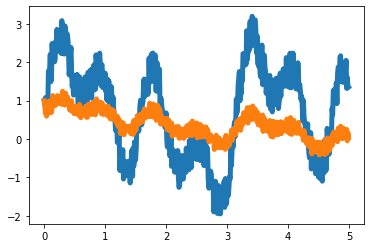

In [141]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.random.rand(T)+np.sin(4*t)+1*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


In [142]:
_x = np.array(dataset_padded.targets)[:,0]

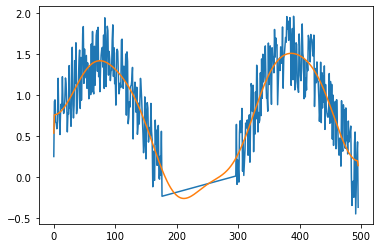

In [143]:
plt.plot(_x)
plt.plot(itstgcn.trim(_x))

In [108]:
# T = 100
# t = np.arange(T)/T * 5

# x = 0.01*np.sin(2*t)+0.1*np.sin(4*t)+0.1*np.sin(8*t)
# eps_x  = np.random.normal(size=T)*0
# y = x.copy()
# for i in range(2,T):
#     y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
# eps_y  = np.random.normal(size=T)*0
# x = x
# y = y
# plt.plot(t,x,color='C0',lw=5)
# plt.plot(t,x+eps_x,alpha=0.5,color='C0')
# plt.plot(t,y,color='C1',lw=5)
# plt.plot(t,y+eps_y,alpha=0.5,color='C1')
# _node_ids = {'node1':0, 'node2':1}

# _FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

# _edges1 = torch.tensor([[0,1]]).tolist()

# data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

# data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [144]:
data_dict1 = itstgcn.load_data('./data/toy_example1.pkl')
loader1 = itstgcn.DatasetLoader(data_dict1)

In [145]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [146]:
dataset = loader1.get_dataset(lags=4)

In [154]:
mindex = [random.sample(range(0, T), int(T*0.9)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [155]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [156]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [157]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [158]:
lrnr.learn(filters=16,epoch=5)

In [159]:
evtor = Eval_csy(lrnr,dataset_padded)

In [160]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [161]:
lrnr_2.learn(filters=16,epoch=5)

In [162]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

In [ ]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

In [ ]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1],'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot((mindex[1][0][0]+mindex[1][0][len(mindex[1][0])-1])/2, 0.1,'s', markersize=110, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

In [3735]:
data_dict1 = itstgcn.load_data('./data/toy_example1.pkl')
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3706]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3707]:
dataset = loader1.get_dataset(lags=4)

In [3744]:
mindex = [[np.array(list(range(40,55)))],[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3709]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3710]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3711]:
lrnr.learn(filters=1,epoch=10)

In [3712]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3713]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3714]:
lrnr_2.learn(filters=1,epoch=10)

In [3715]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

In [3722]:
np.array(dataset_miss.features).shape

(96, 2, 4)

In [ ]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)

# 시도 1

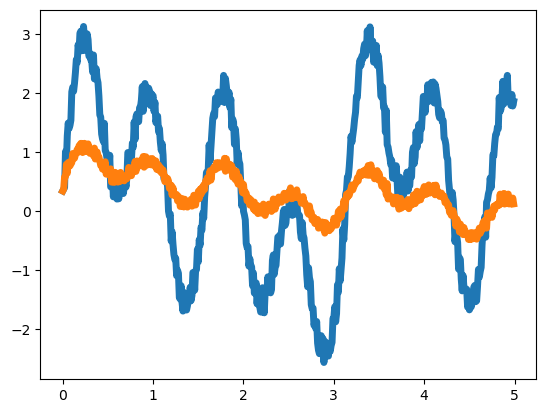

In [739]:
T = 500
t = np.arange(T)/T * 5

x = np.sin(2*t)+0.5*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')

In [740]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [741]:
dataset = loader1.get_dataset(lags=4)

In [742]:
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [743]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [744]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [745]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [746]:
lrnr.learn(filters=4,epoch=5)

In [747]:
evtor = Eval_csy(lrnr,dataset_padded)

In [748]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [749]:
lrnr_2.learn(filters=4,epoch=5)

In [750]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

In [776]:
# with plt.style.context('seaborn-white'):
#     fig, ax1 = plt.subplots(figsize=(40,15))
#     # fig.suptitle('Figure 1(node 1)',fontsize=40)
#     ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
#     ax1.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
#     ax1.tick_params(axis='y', labelsize=40)
#     ax1.tick_params(axis='x', labelsize=40)
# plt.savefig('node1_fst.png')

In [777]:
# with plt.style.context('seaborn-white'):
#     fig, ax2 = plt.subplots(figsize=(40,15))
#     # fig.suptitle('Figure 1(node 1)',fontsize=40)
#     ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
#     ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data',markersize=15)
#     ax2.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
#     ax2.tick_params(axis='y', labelsize=40)
#     ax2.tick_params(axis='x', labelsize=40)
# plt.savefig('node1_snd.png')

In [778]:
# with plt.style.context('seaborn-white'):
#     fig, ax3 = plt.subplots(figsize=(40,15))
#     # fig.suptitle('Figure 1(node 1)',fontsize=40)    
#     ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
#     ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolarion')
#     ax3.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
#     ax3.tick_params(axis='y', labelsize=40)
#     ax3.tick_params(axis='x', labelsize=40)
# plt.savefig('node1_3rd.png')

In [780]:
# with plt.style.context('seaborn-white'):
#     fig, ax4 = plt.subplots(figsize=(40,15))
#     # fig.suptitle('Figure 1(node 1)',fontsize=40)
#     ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
#     ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
#     ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
#     ax4.plot(138, -1.2, 'o', markersize=230, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
#     ax4.plot(220, -1.5, 'o', markersize=200, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
#     ax4.plot(290, -1.2, 'o', markersize=310, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
#     ax4.plot(455, -0.9, 'o', markersize=280, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
#     ax4.legend(fontsize=40,loc='lower left',facecolor='white', frameon=True)
#     ax4.tick_params(axis='y', labelsize=40)
#     ax4.tick_params(axis='x', labelsize=40)
# plt.savefig('node1_4th_1.png')

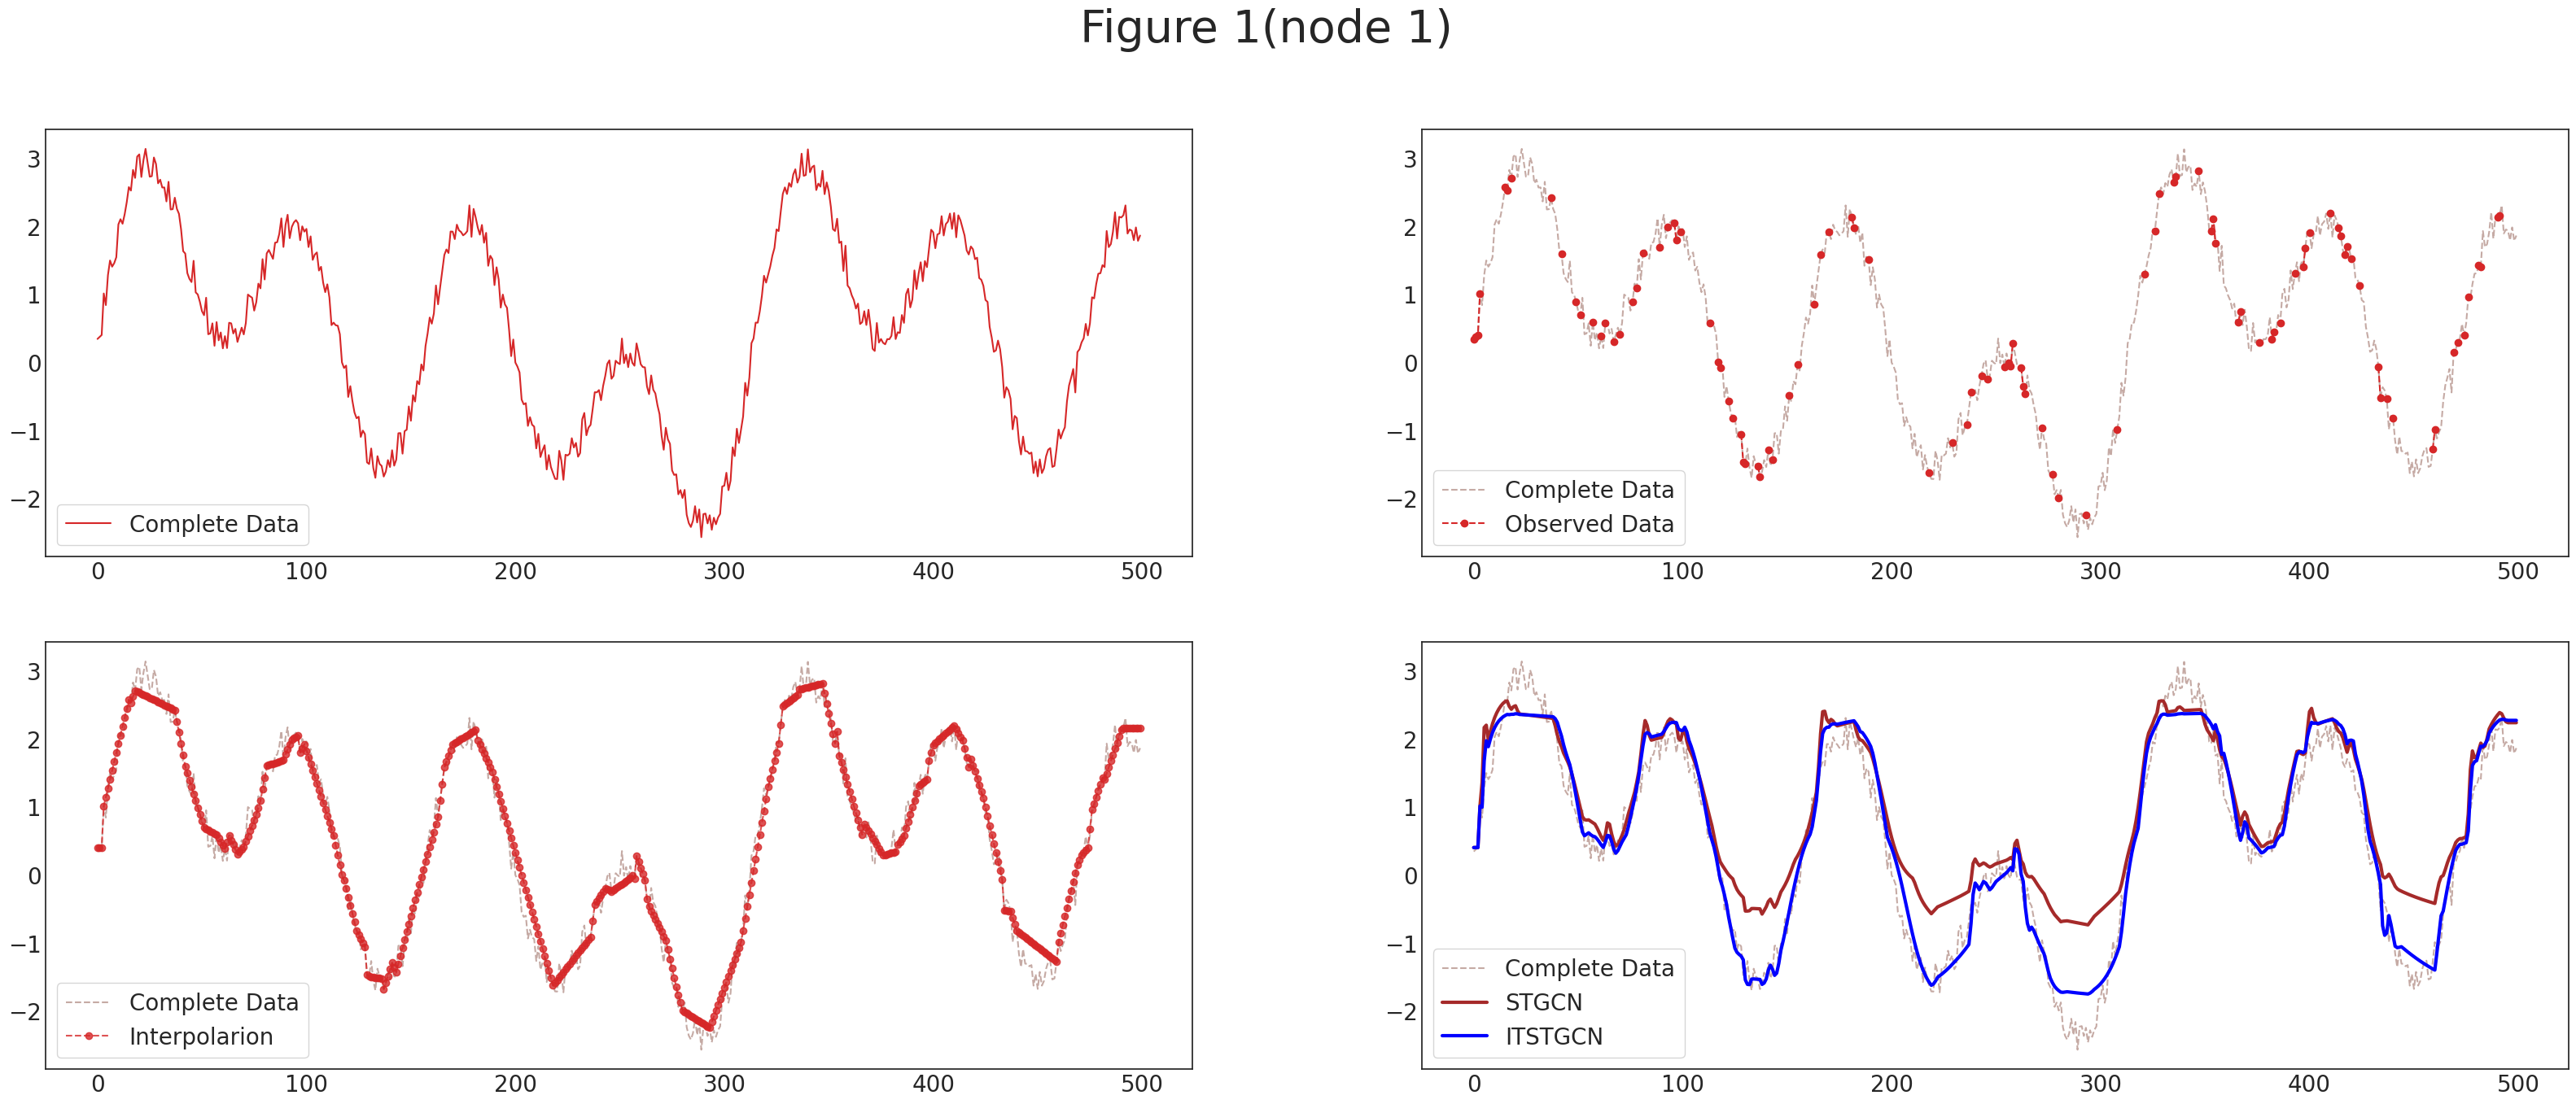

In [781]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node1.png')

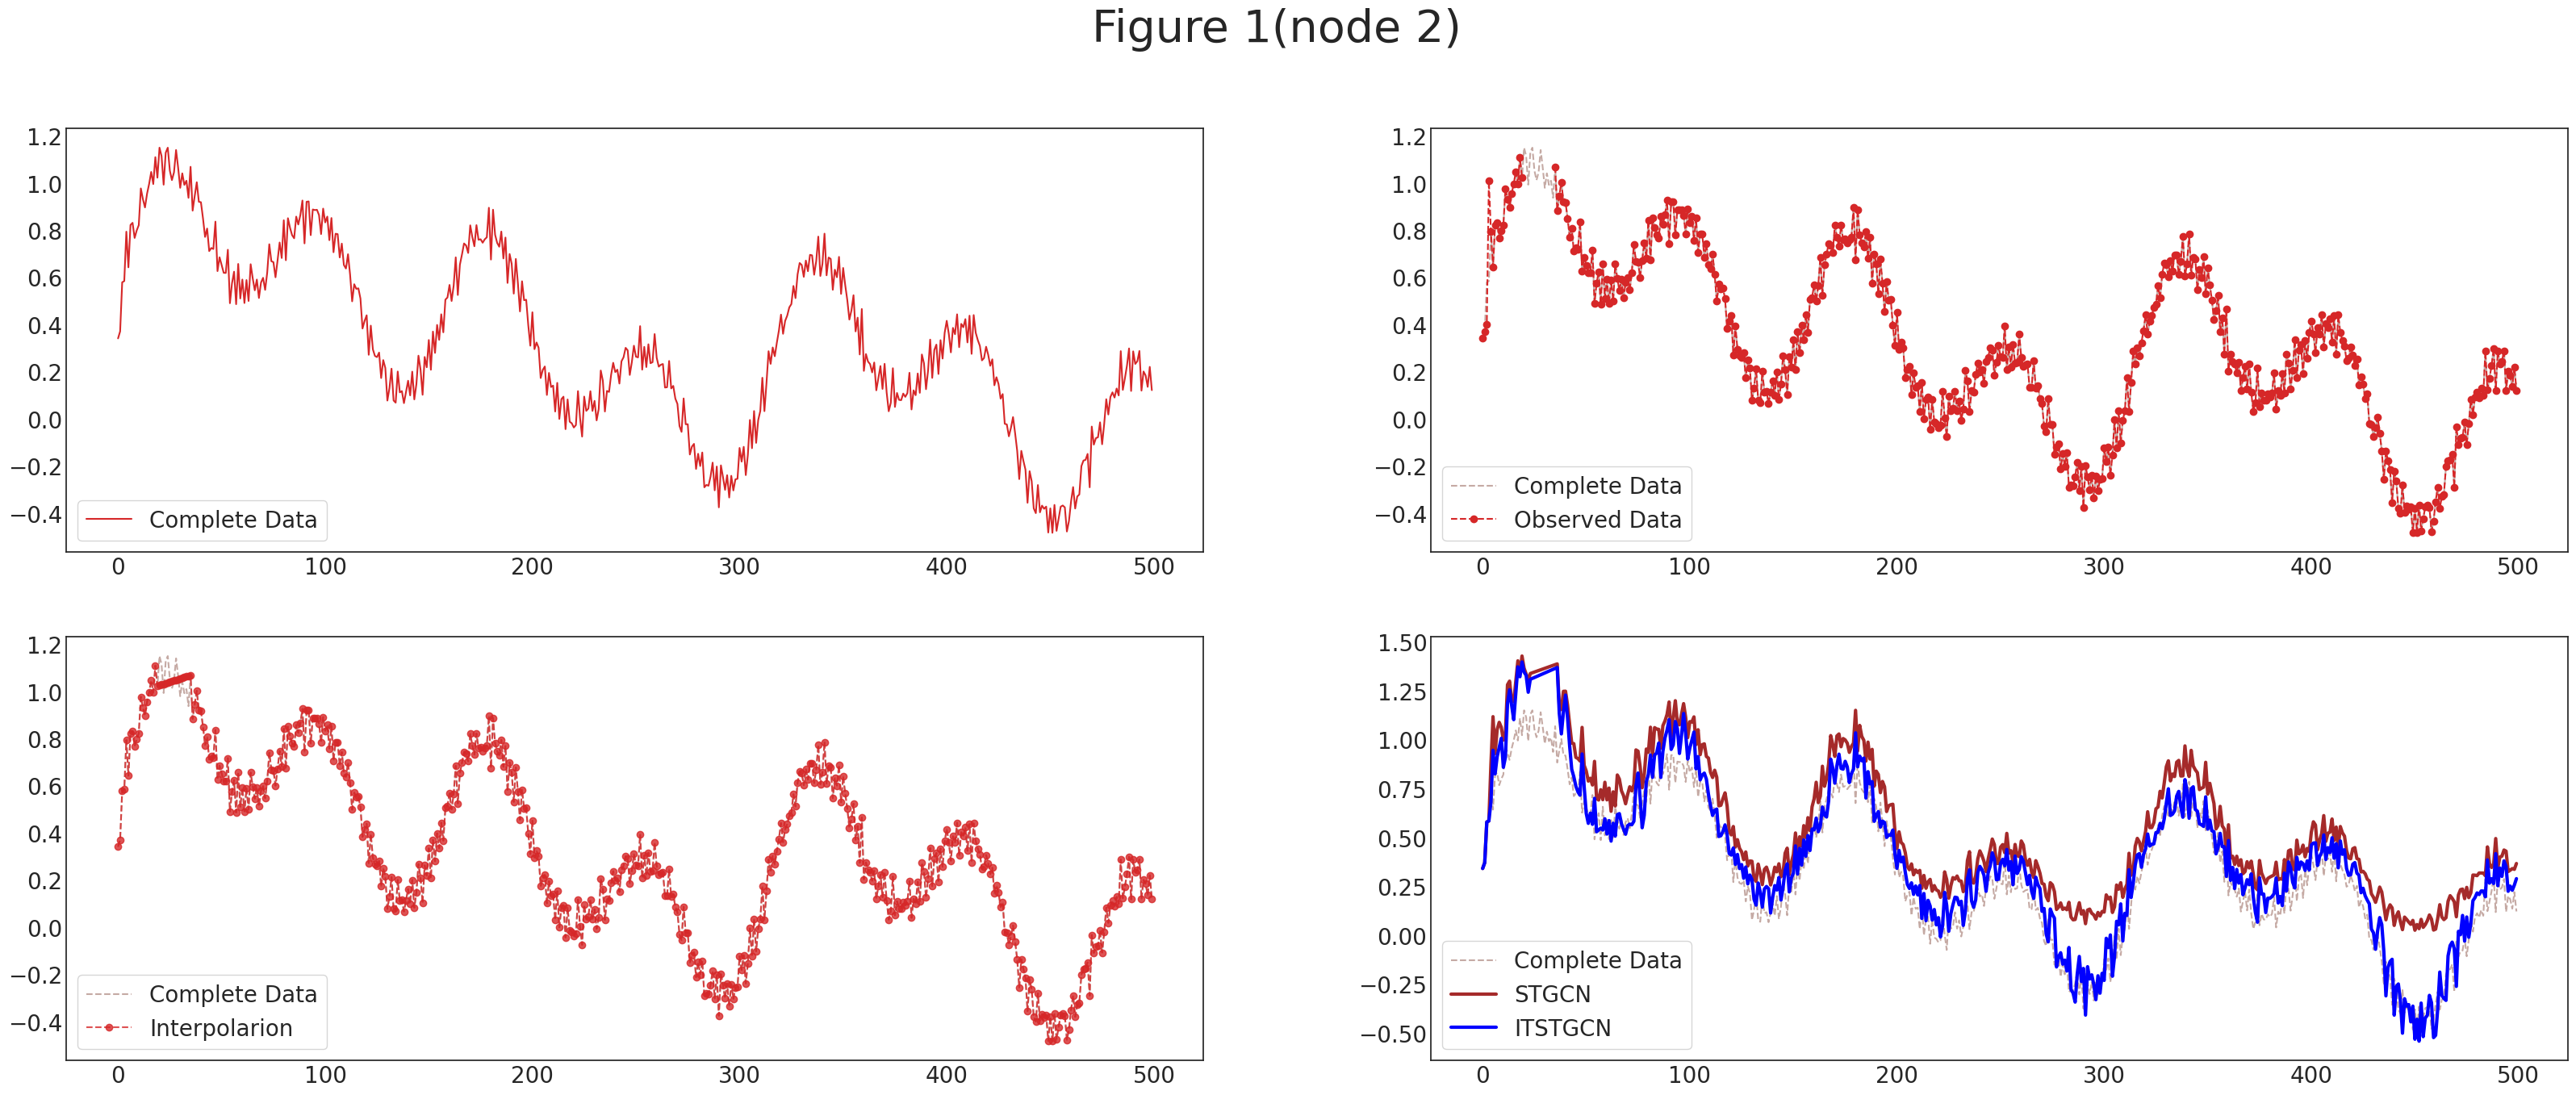

In [782]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node2.png')

# 시도 2

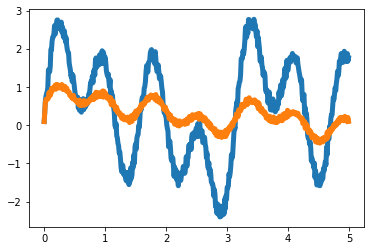

In [2931]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+0.4*np.random.rand(T)+np.sin(4*t)+1.3*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [2932]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [2933]:
dataset = loader1.get_dataset(lags=4)

In [2934]:
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [2935]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [2936]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [2937]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [2938]:
lrnr.learn(filters=8,epoch=5)

In [2939]:
evtor = Eval_csy(lrnr,dataset_padded)

In [2940]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [2941]:
lrnr_2.learn(filters=8,epoch=5)

In [2942]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

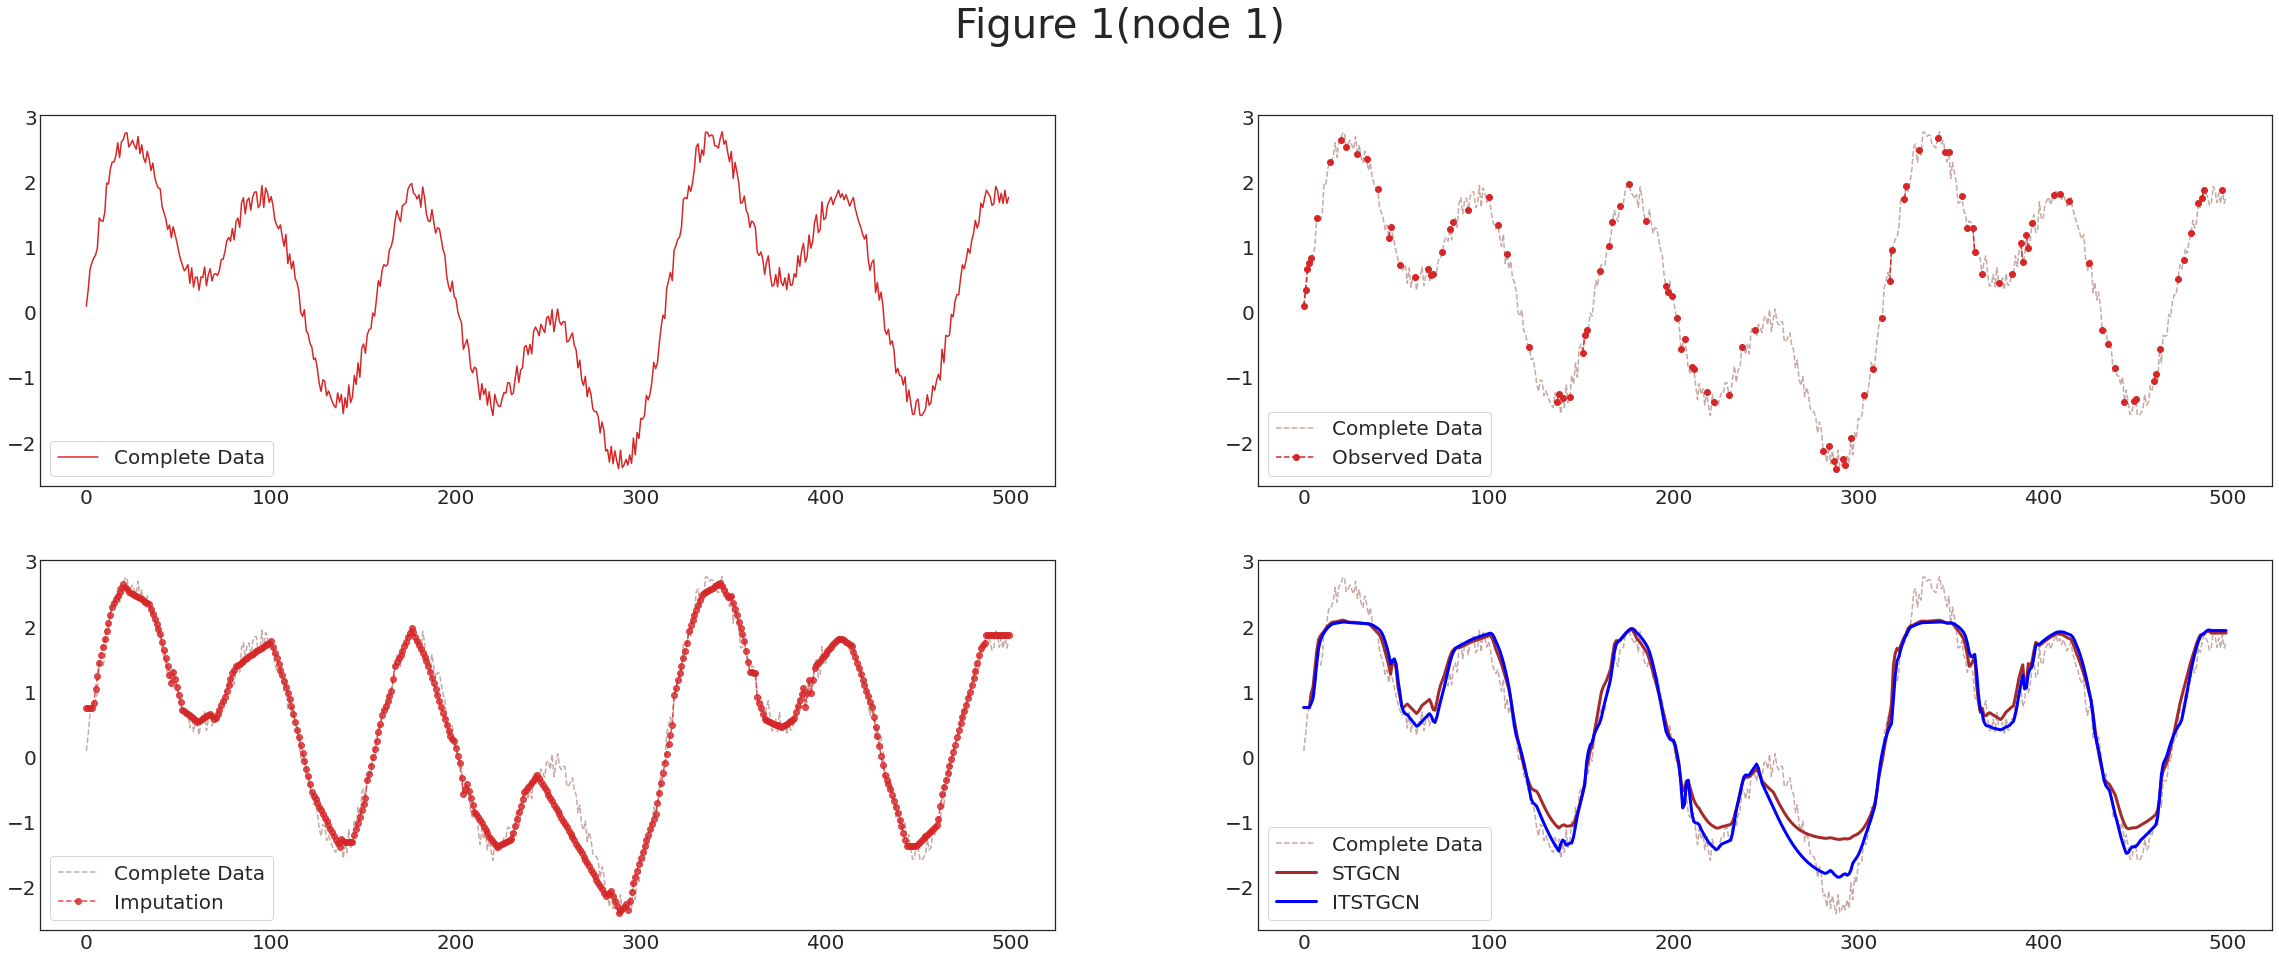

In [2946]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try1_node1.png')

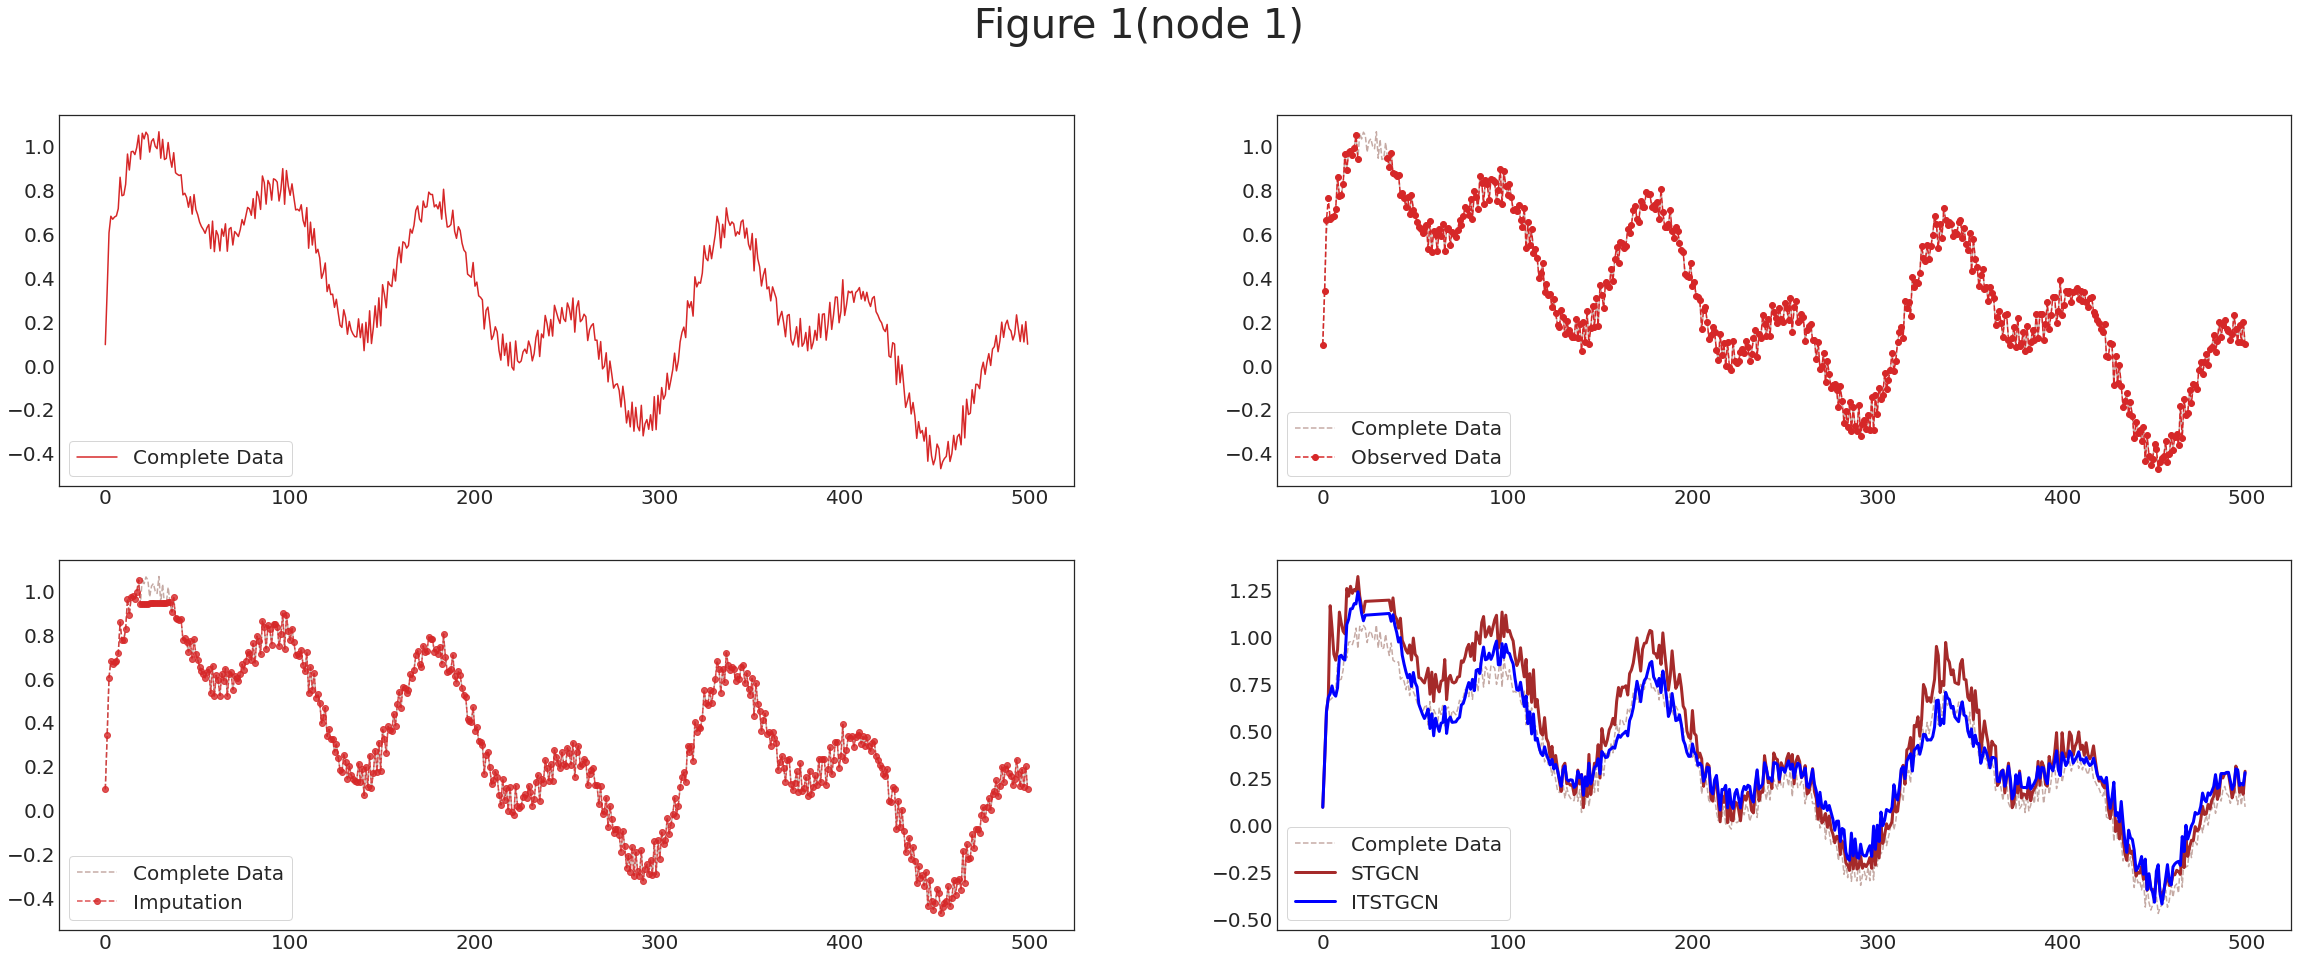

In [2948]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try1_node2.png')

# 시도 3

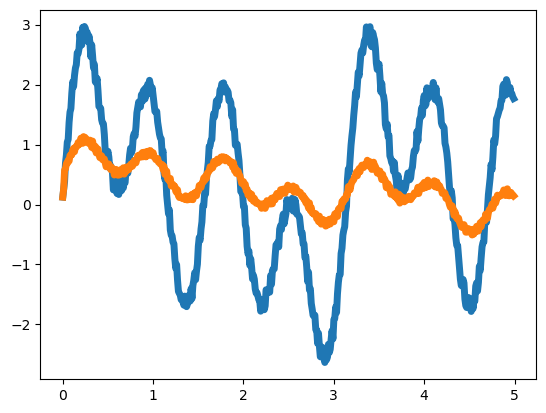

In [619]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+0.3*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


In [620]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [621]:
dataset = loader1.get_dataset(lags=4)

In [622]:
# mindex = [random.sample(range(0, T), int(T*0.7)),[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [623]:
mindex = itstgcn.rand_mindex(dataset,mrate=0.8)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [624]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [625]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [626]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [627]:
lrnr.learn(filters=16,epoch=5)

In [628]:
evtor = Eval_csy(lrnr,dataset_padded)

In [629]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [630]:
lrnr_2.learn(filters=16,epoch=5)

In [631]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

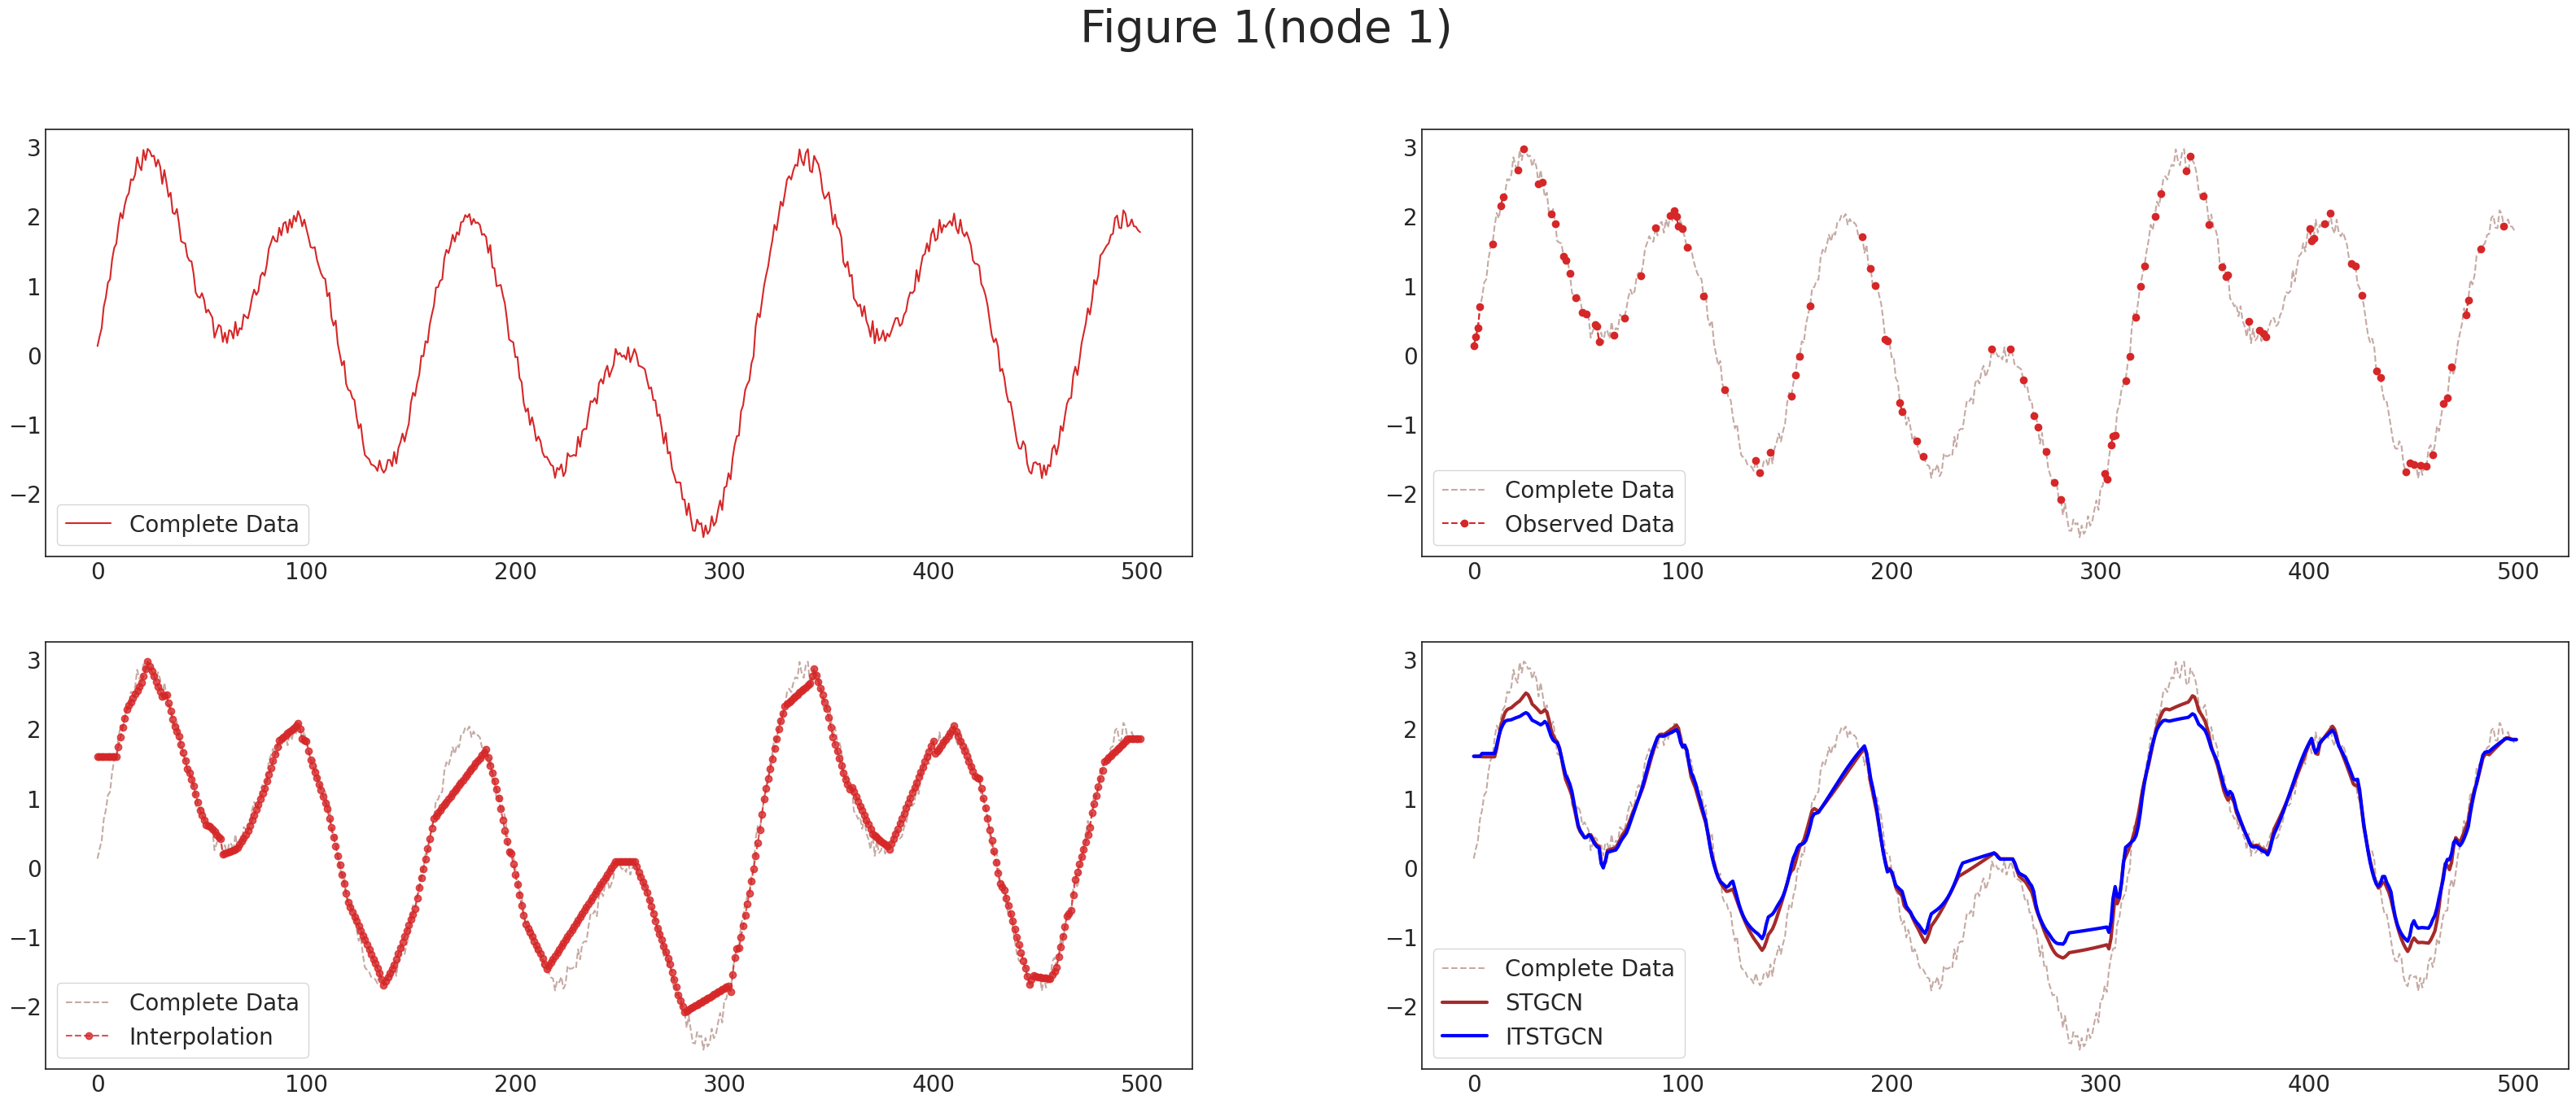

In [632]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node1.png')

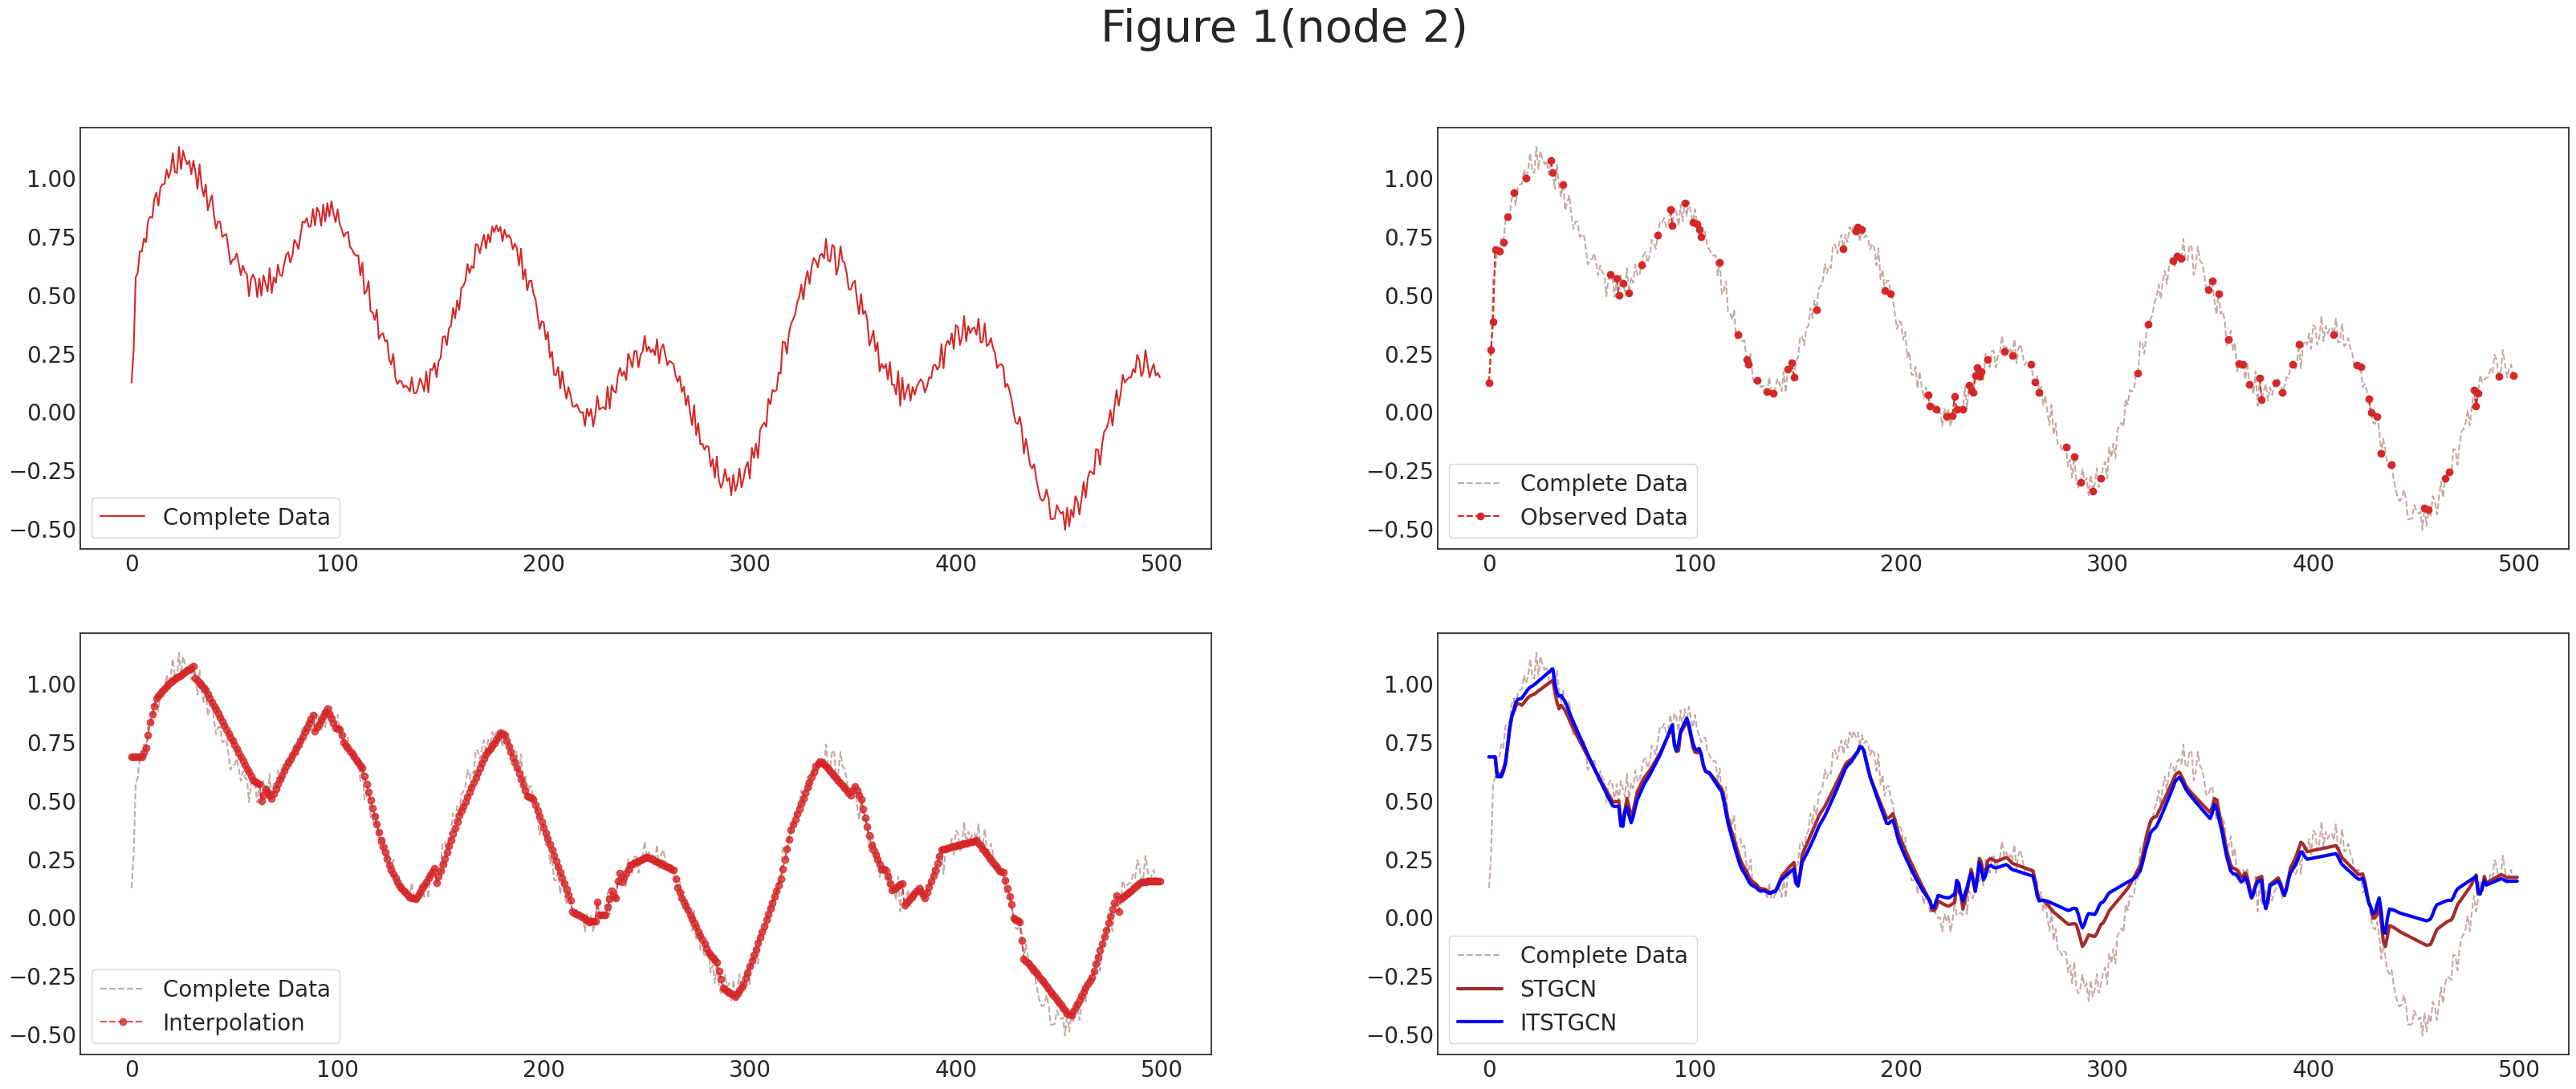

In [633]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node2.png')

# 시도 4 noise 0

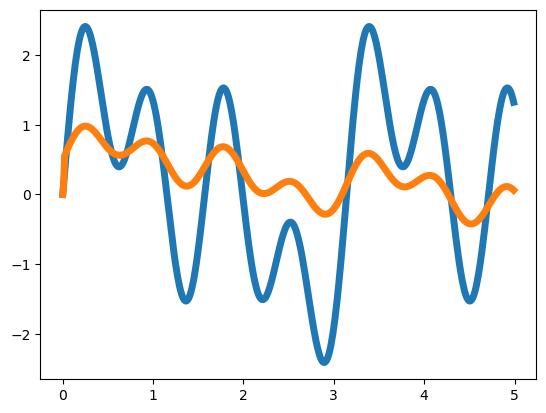

In [649]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+np.sin(4*t)+1.2*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [650]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [651]:
dataset = loader1.get_dataset(lags=4)

In [652]:
mindex = [random.sample(range(0, T), int(T*0.5)),[np.array(list(range(50,95)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [653]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [654]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [655]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [656]:
lrnr.learn(filters=16,epoch=5)

In [657]:
evtor = Eval_csy(lrnr,dataset_padded)

In [658]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [659]:
lrnr_2.learn(filters=16,epoch=5)

In [660]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

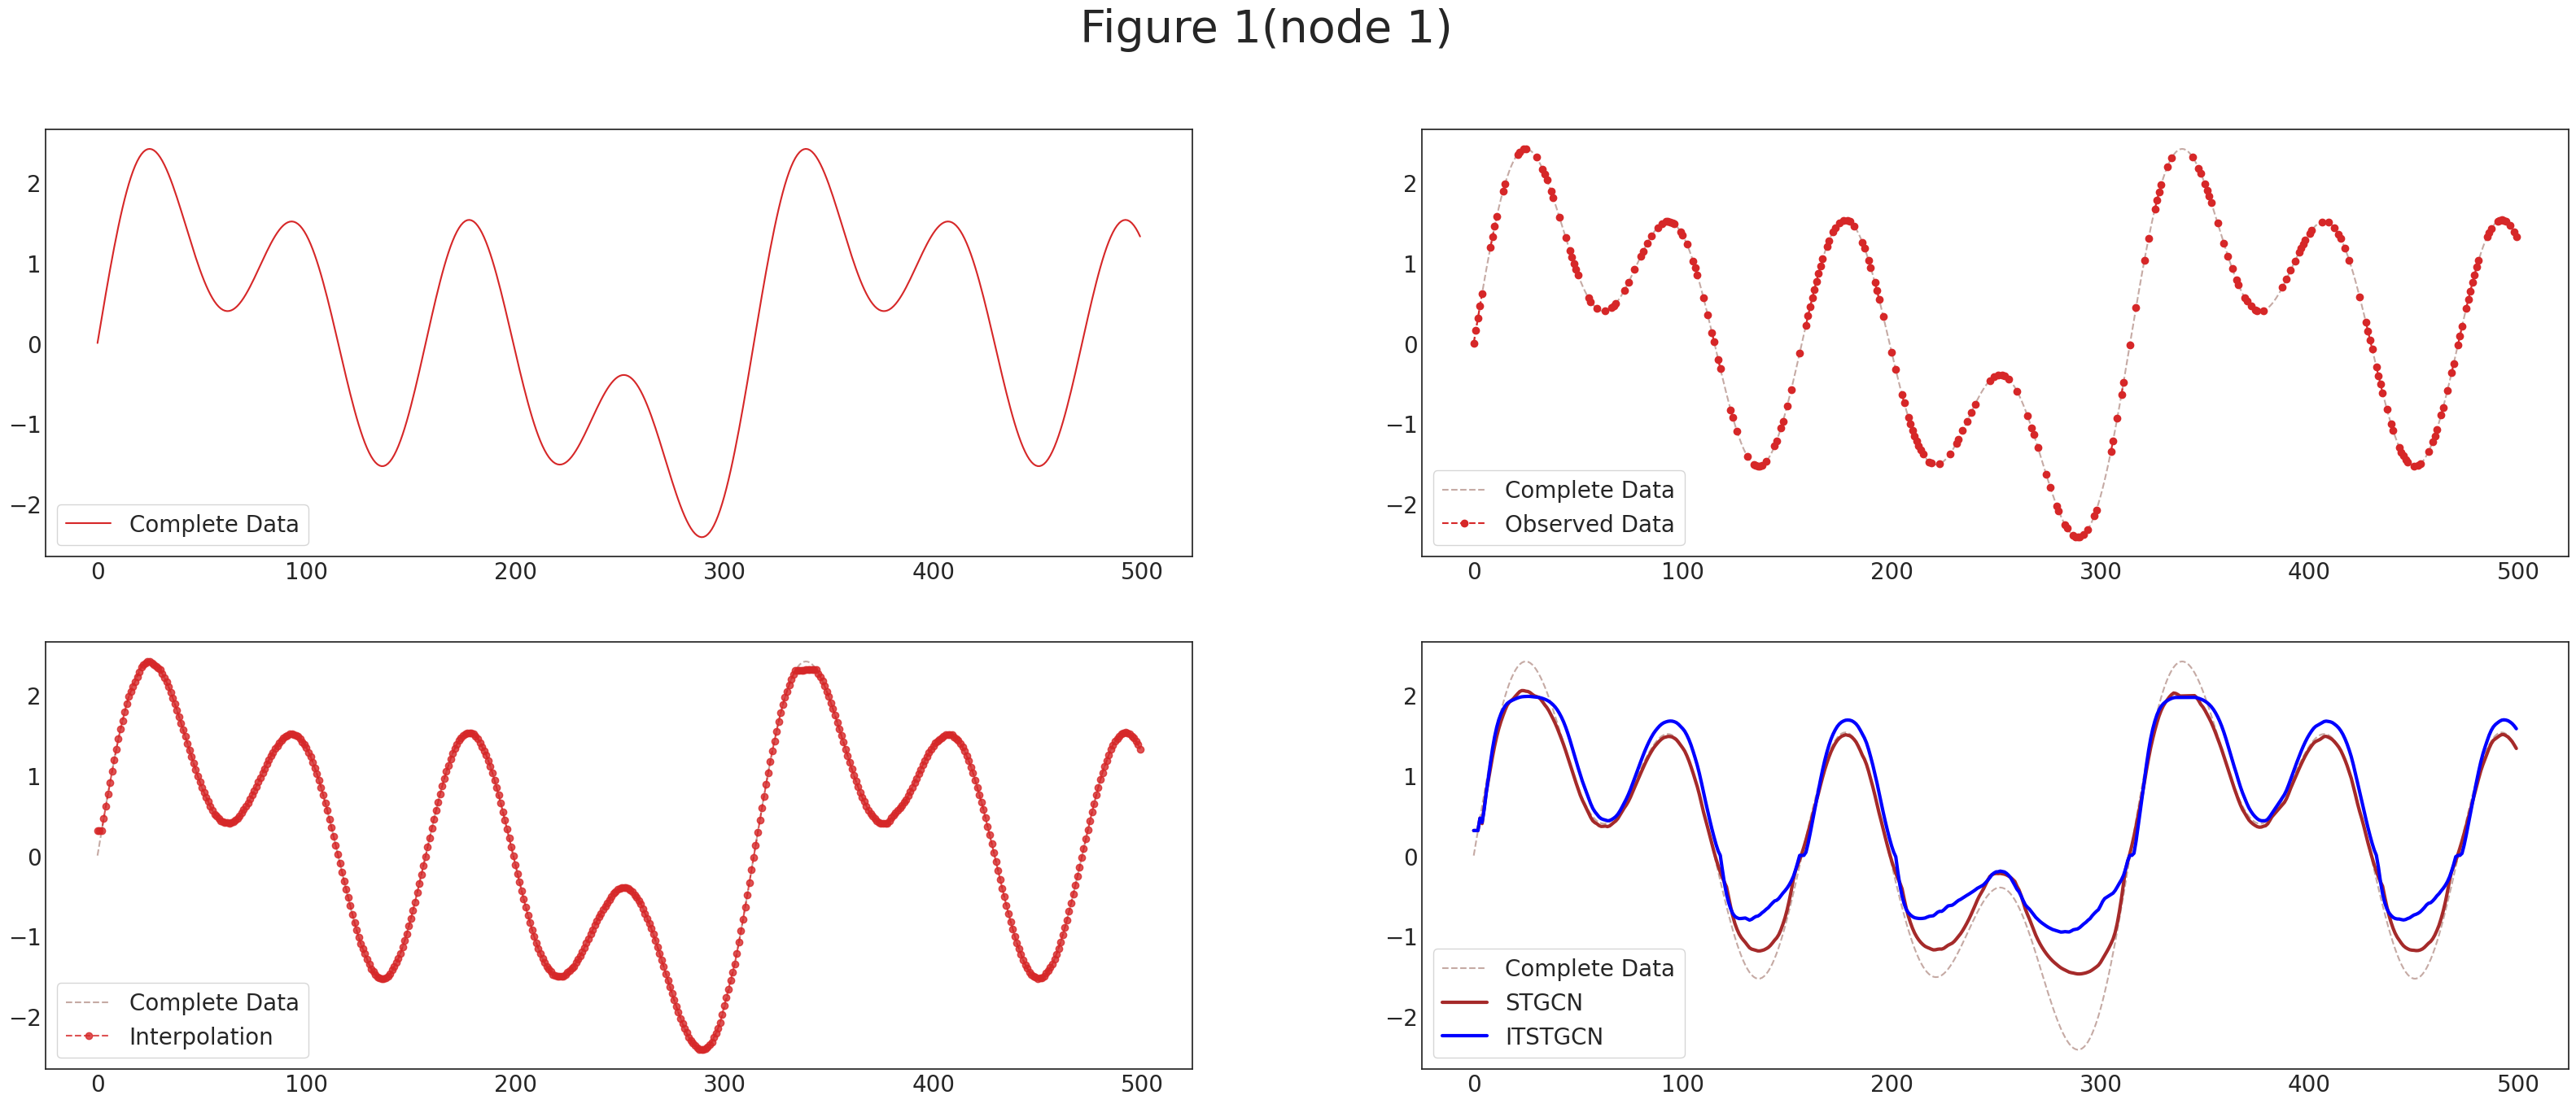

In [661]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(135, -1.5, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(220, -1.5, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(290, -1.8, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(450, -1.5, 'o', markersize=120, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node1_2.png')

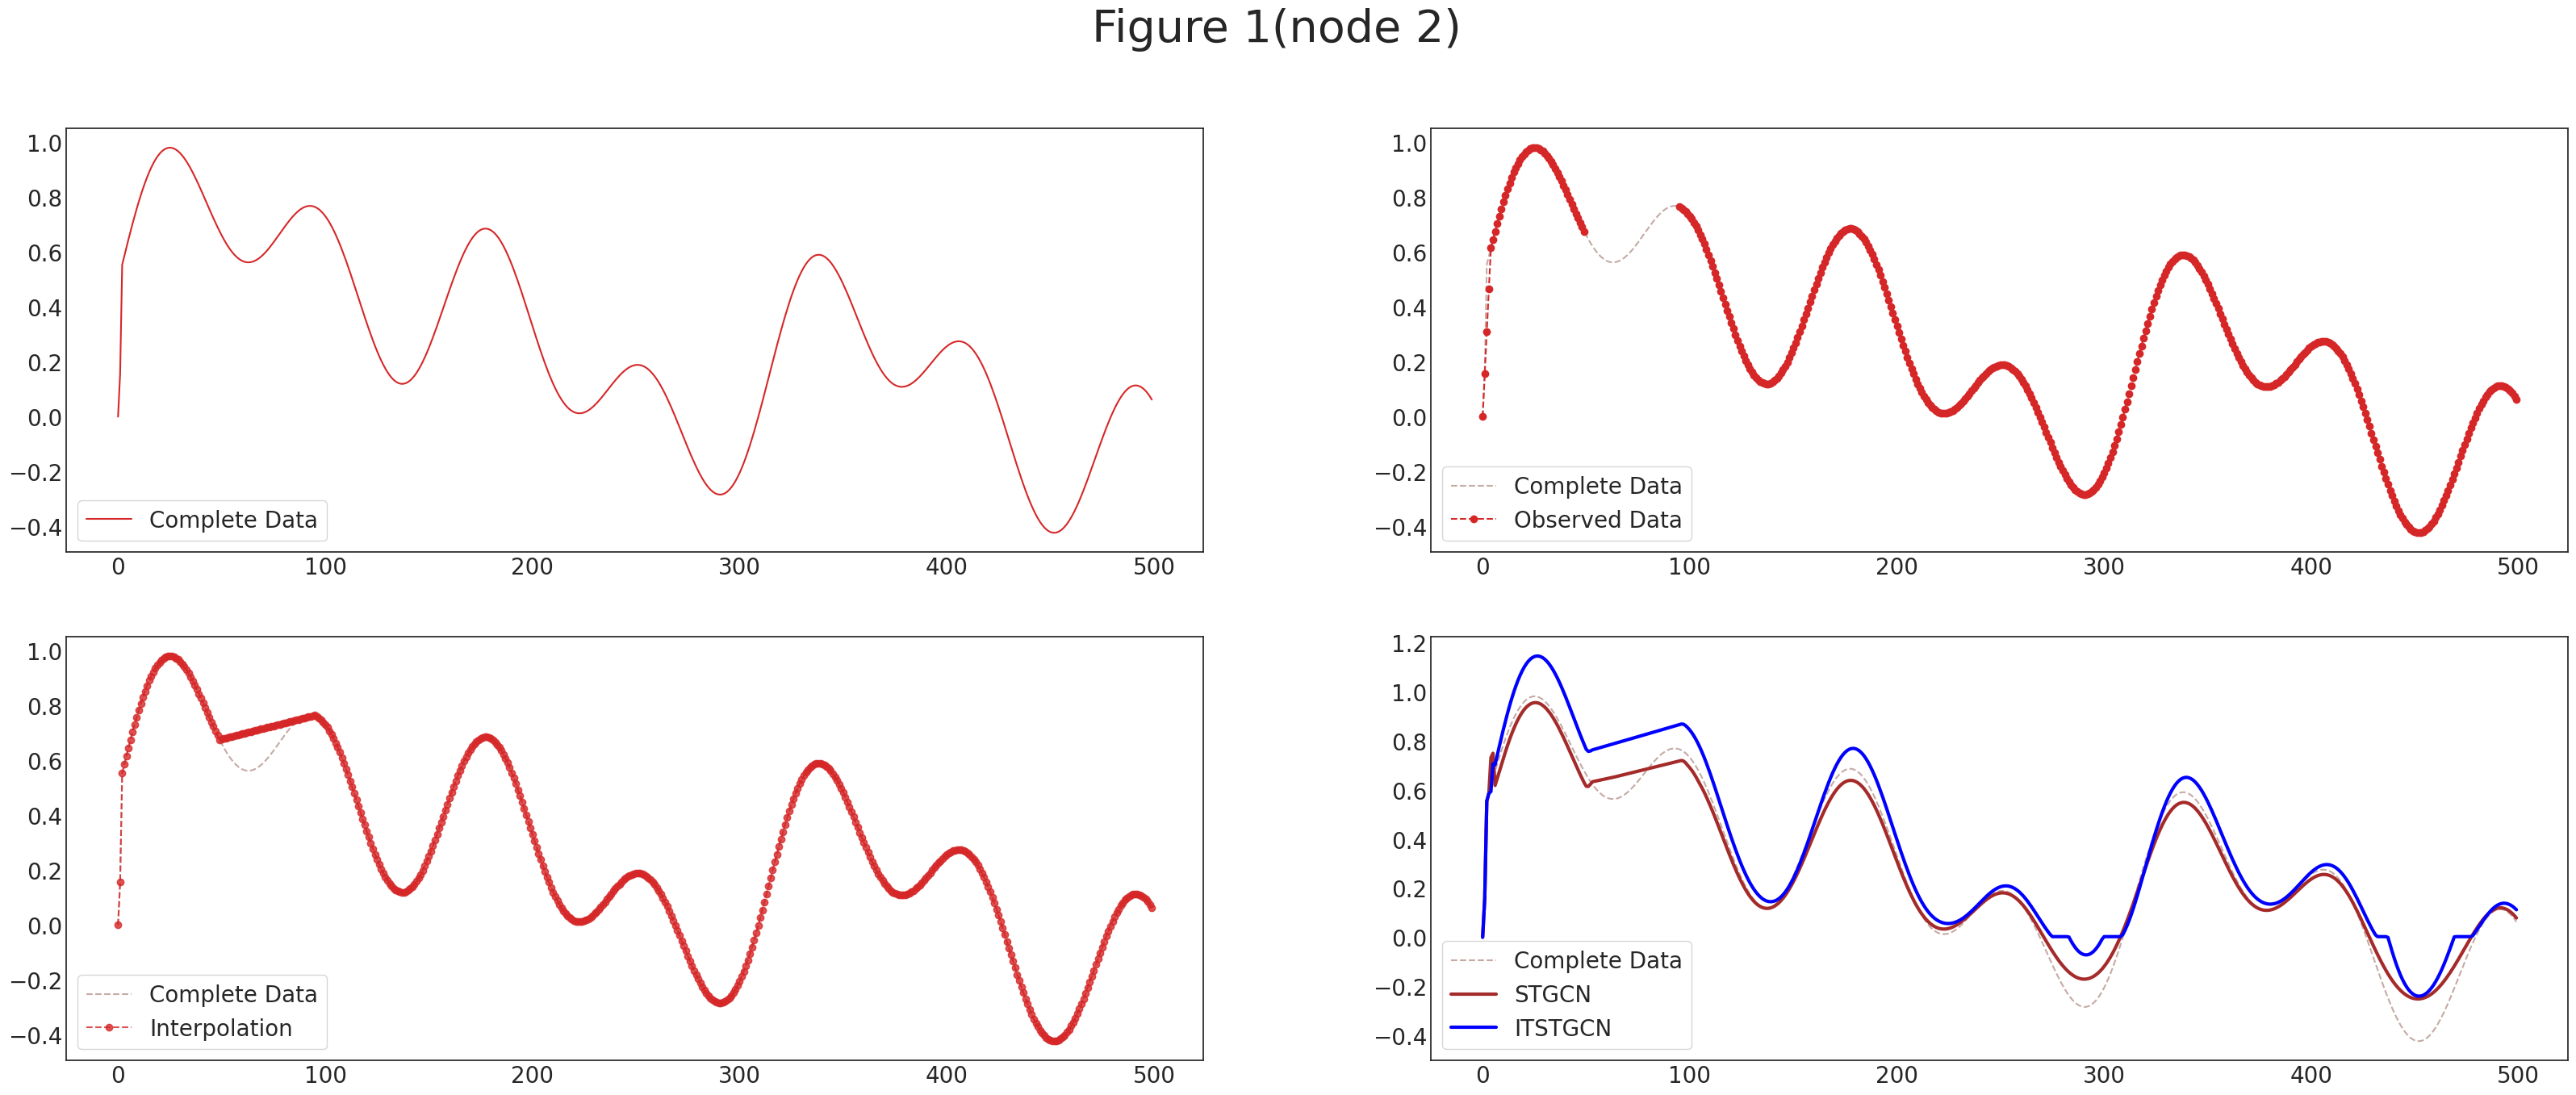

In [662]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(75, 0.75, 'o', markersize=150, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node2_2.png')

# 시도 5 noise 10%

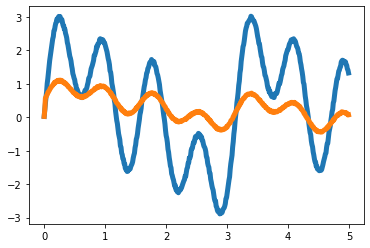

In [3270]:
T = 500
t = np.arange(T)/T * 5

x = 1.5*np.sin(2*t)+0.1*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [3271]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3272]:
dataset = loader1.get_dataset(lags=4)

In [3273]:
mindex = [random.sample(range(0, T), int(T*0.8)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3274]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3275]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3276]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3277]:
lrnr.learn(filters=8,epoch=5)

In [3278]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3279]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3280]:
lrnr_2.learn(filters=8,epoch=5)

In [3281]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

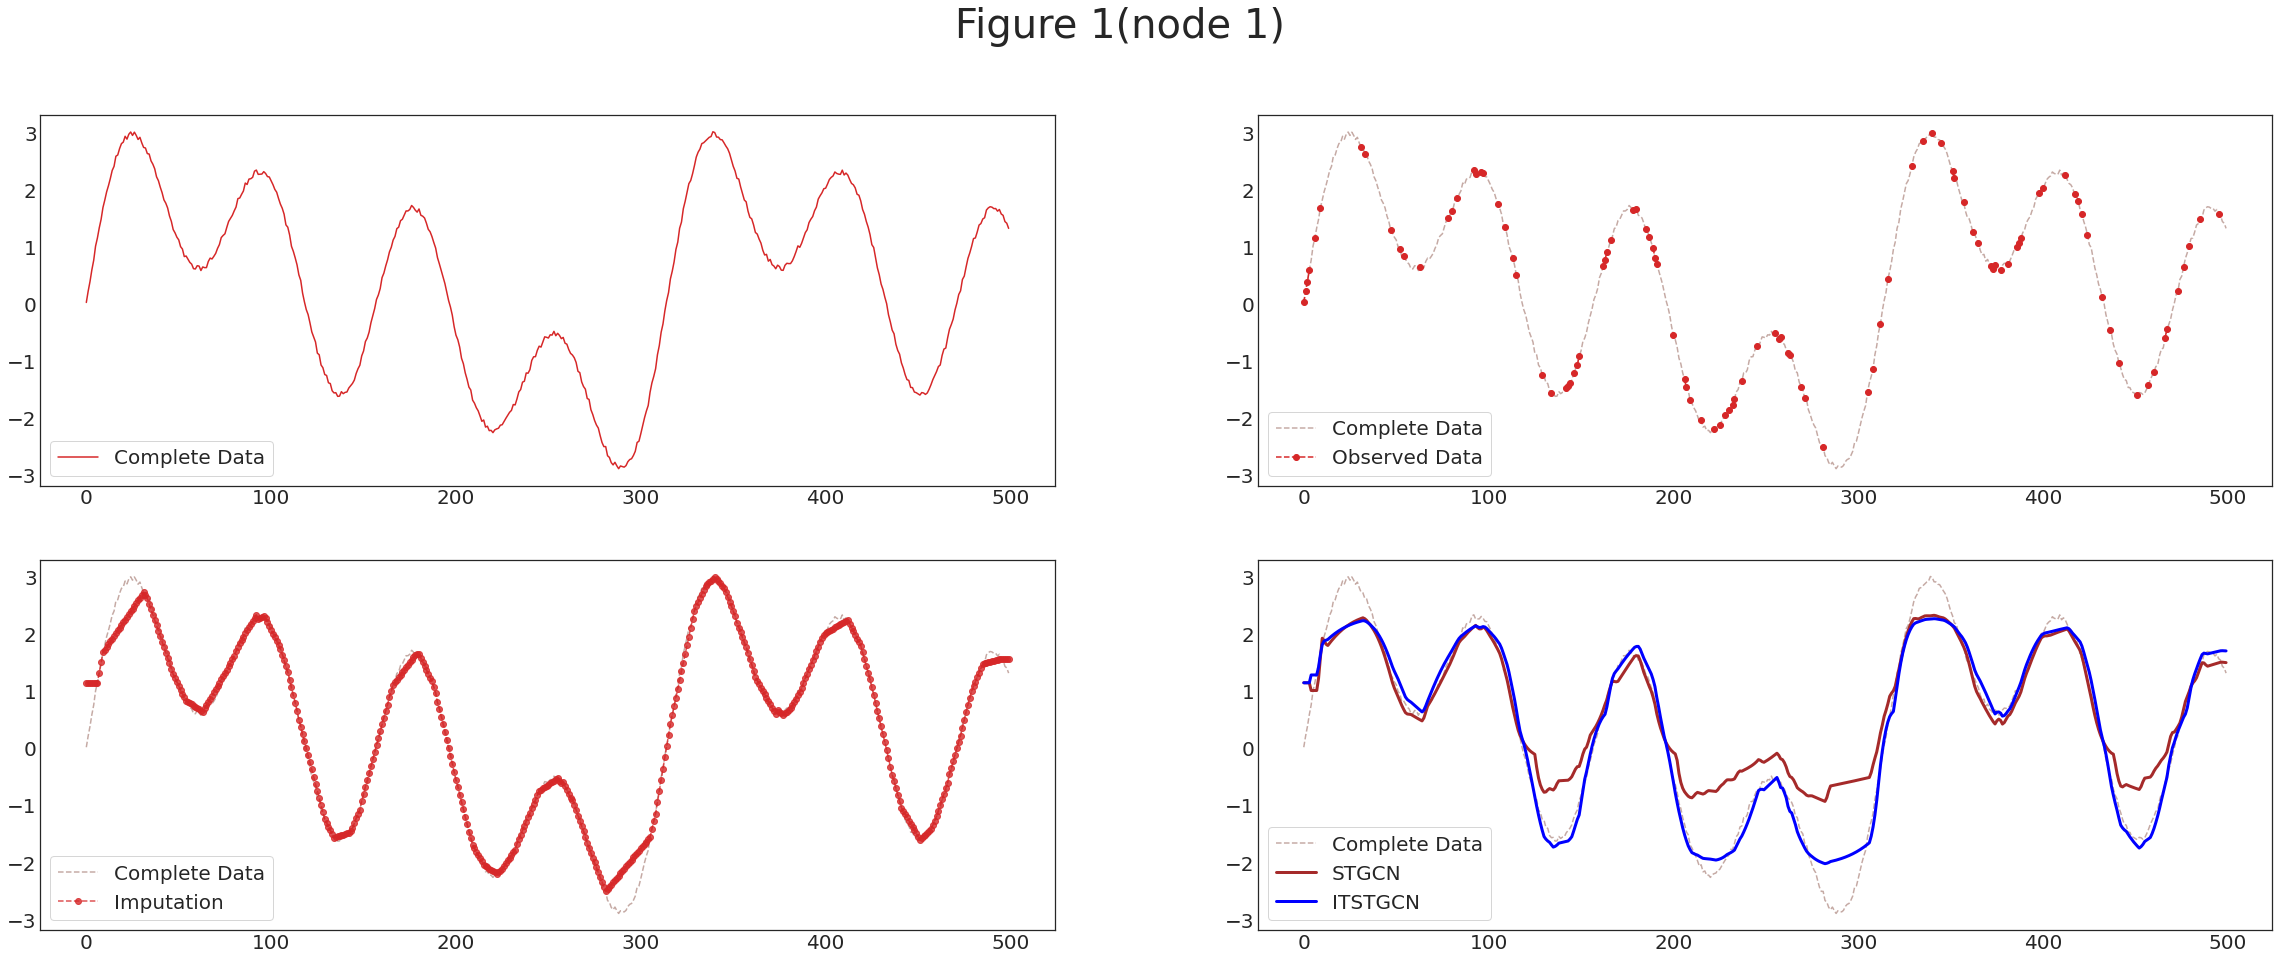

In [3285]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try3_node1_noise10.png')

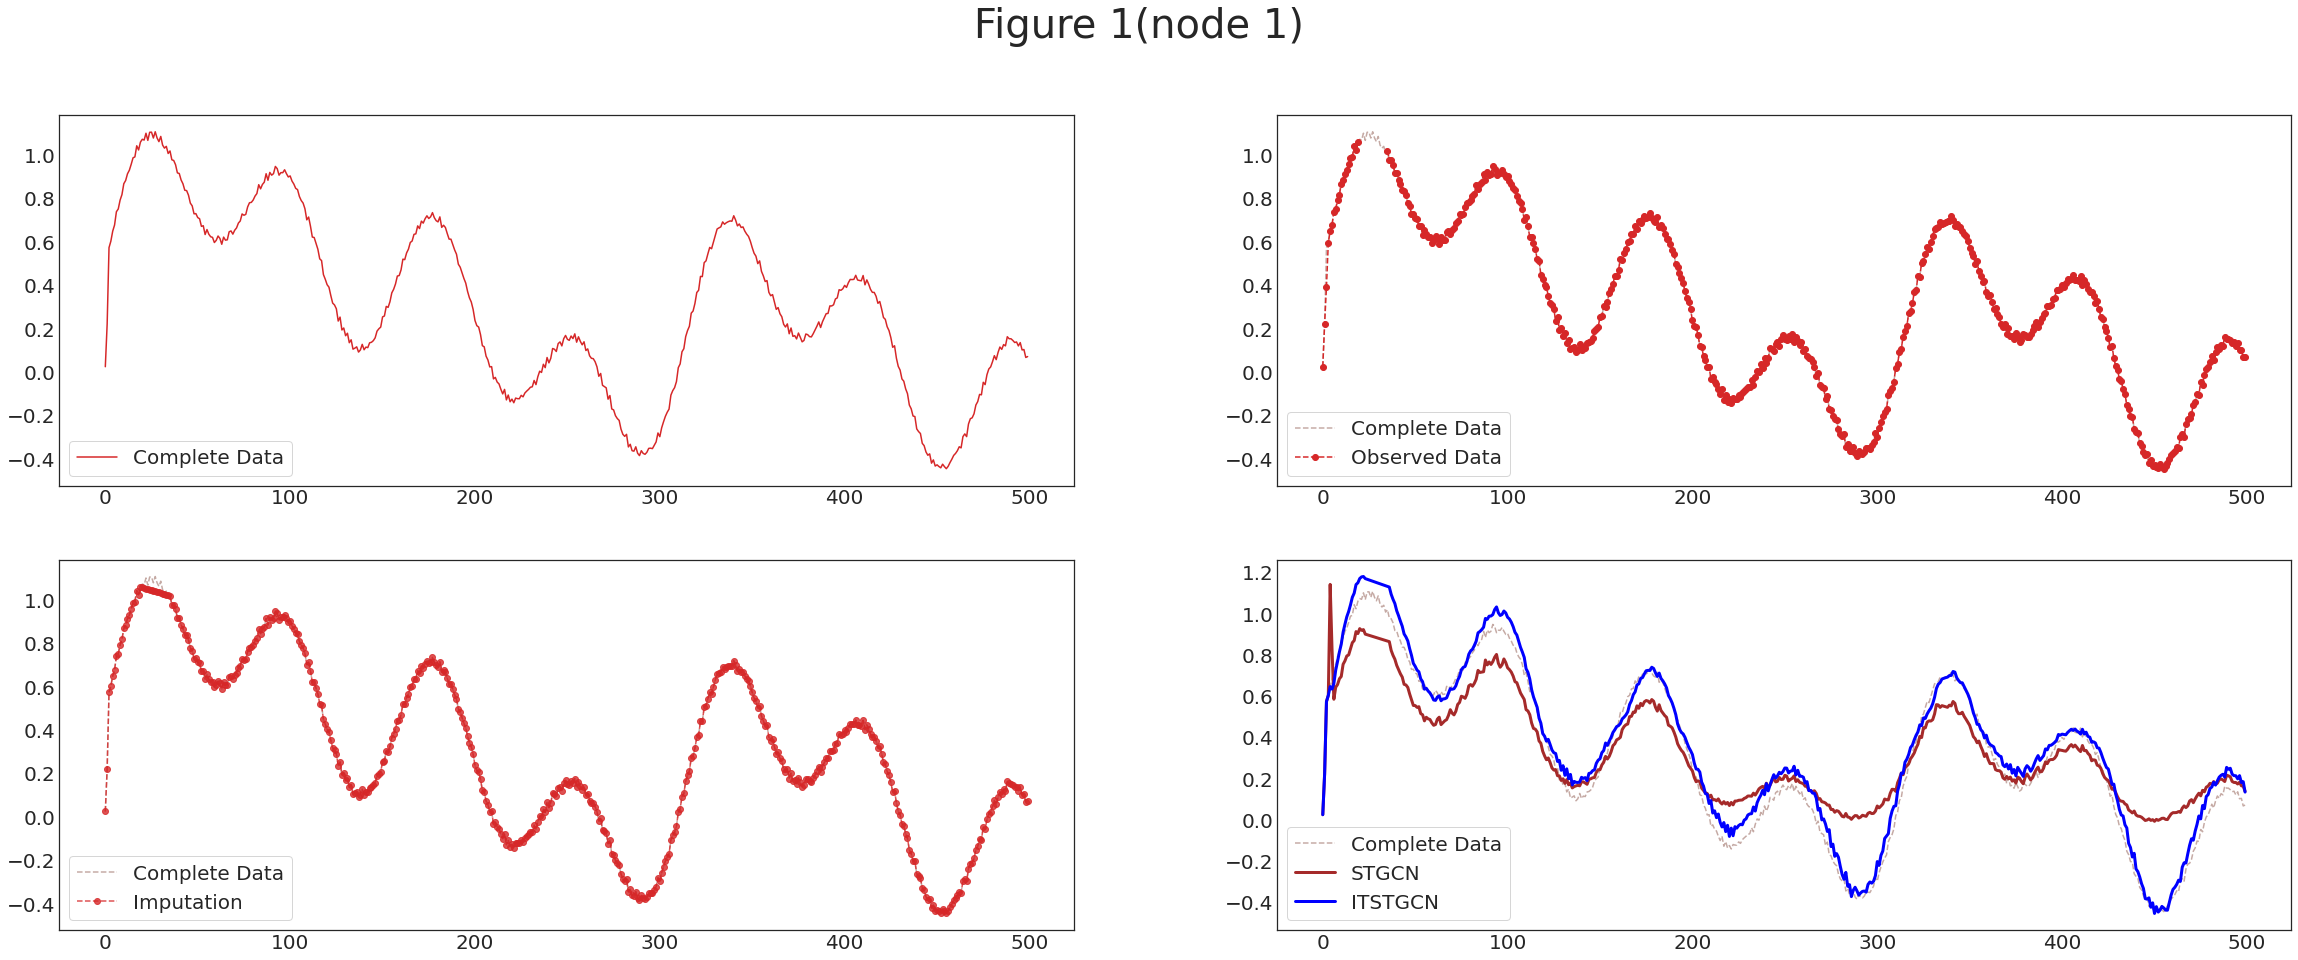

In [3287]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try3_node2_noise10.png')

# 시도 6 noise 20%

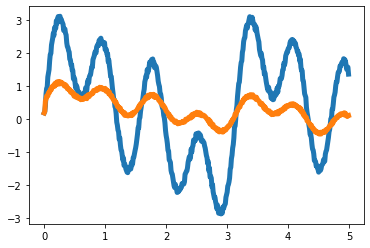

In [3330]:
T = 500
t = np.arange(T)/T * 5

x = 1.5*np.sin(2*t)+0.2*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [3331]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3332]:
dataset = loader1.get_dataset(lags=4)

In [3333]:
mindex = [random.sample(range(0, T), int(T*0.75)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3334]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3335]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3336]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3337]:
lrnr.learn(filters=8,epoch=5)

In [3338]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3339]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3340]:
lrnr_2.learn(filters=8,epoch=5)

In [3341]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

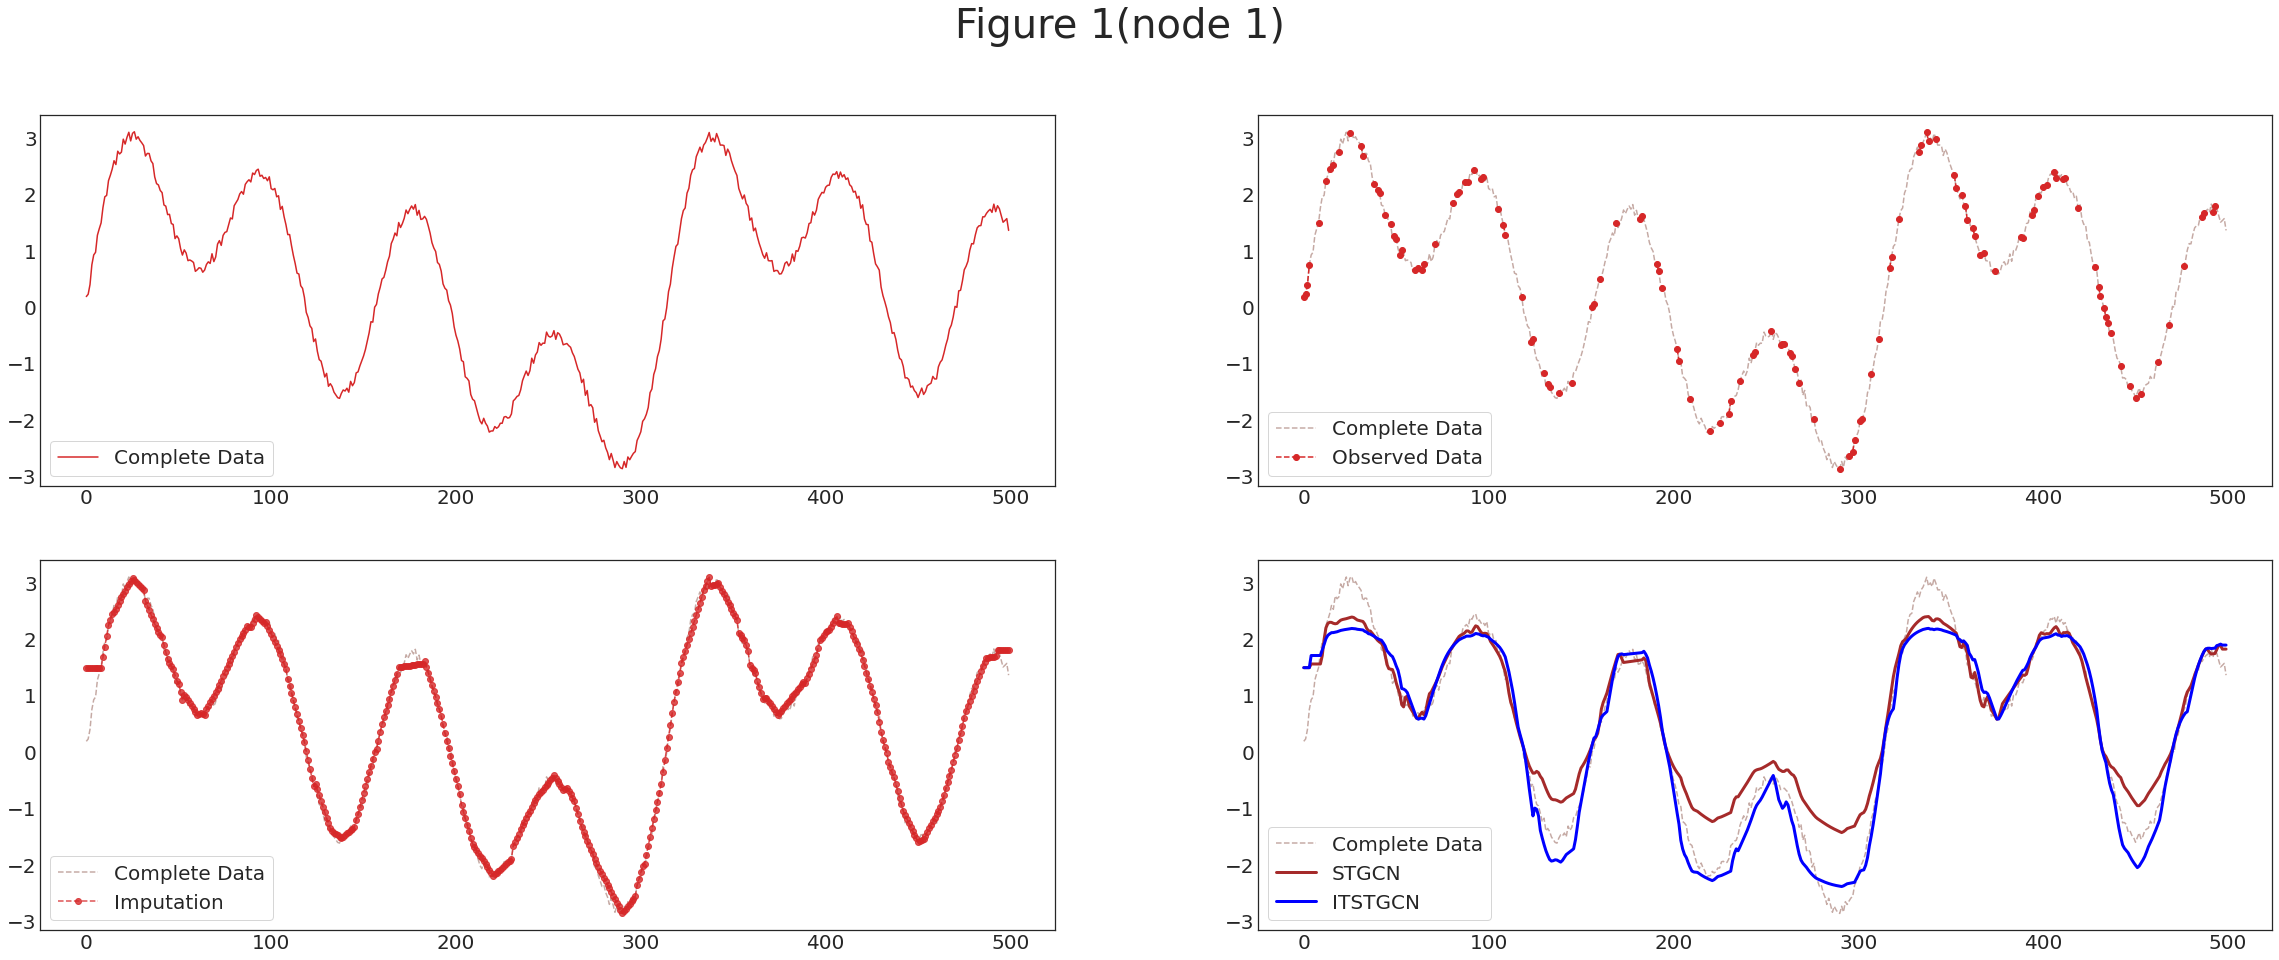

In [3345]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try4_node1_noise20.png')

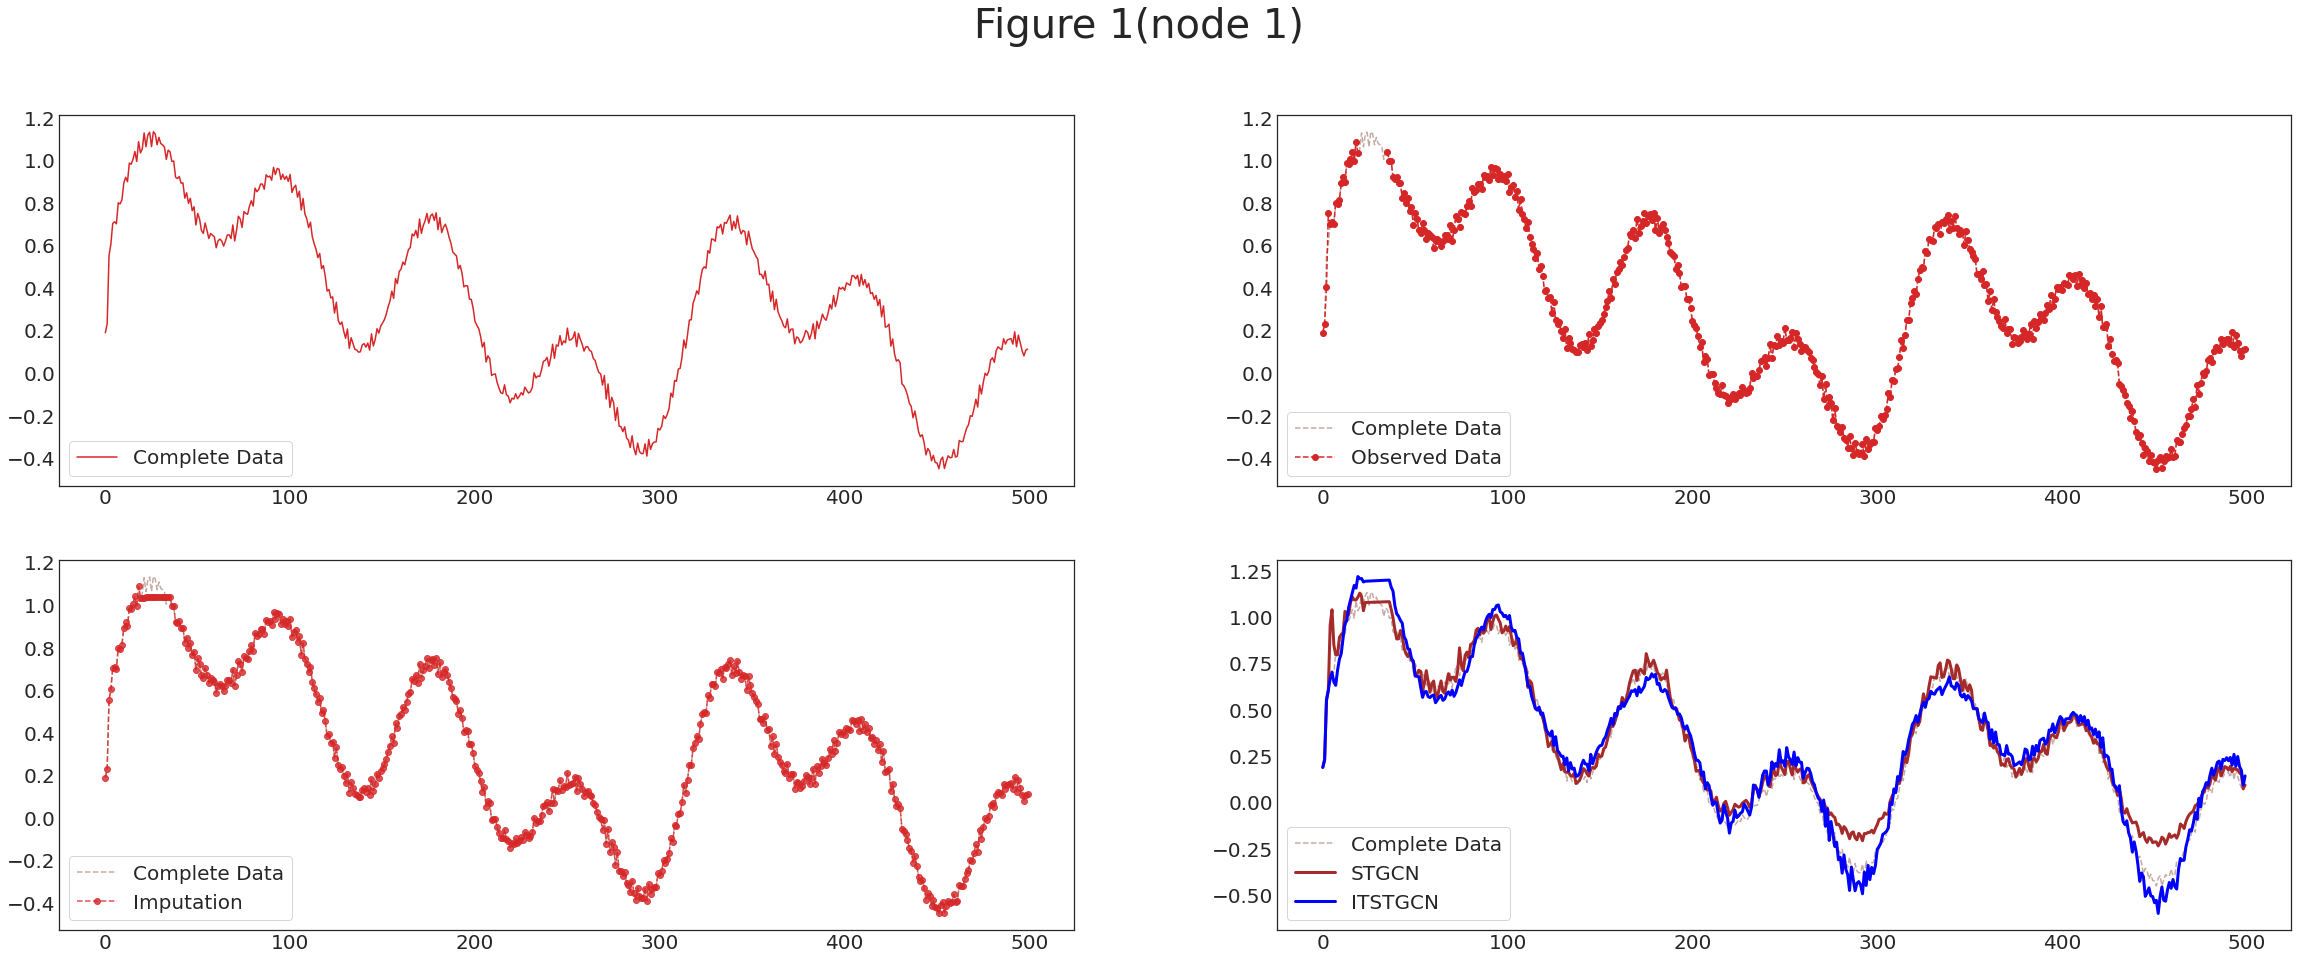

In [3347]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node2_noise20.png')

# 시도 7 noise 30%

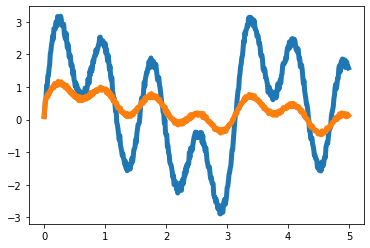

In [3351]:
T = 500
t = np.arange(T)/T * 5

x = 1.5*np.sin(2*t)+0.3*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [3352]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3353]:
dataset = loader1.get_dataset(lags=4)

In [3354]:
mindex = [random.sample(range(0, T), int(T*0.75)),[np.array(list(range(20,35)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3355]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3356]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3357]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3358]:
lrnr.learn(filters=8,epoch=5)

In [3359]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3360]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3361]:
lrnr_2.learn(filters=8,epoch=5)

In [3362]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

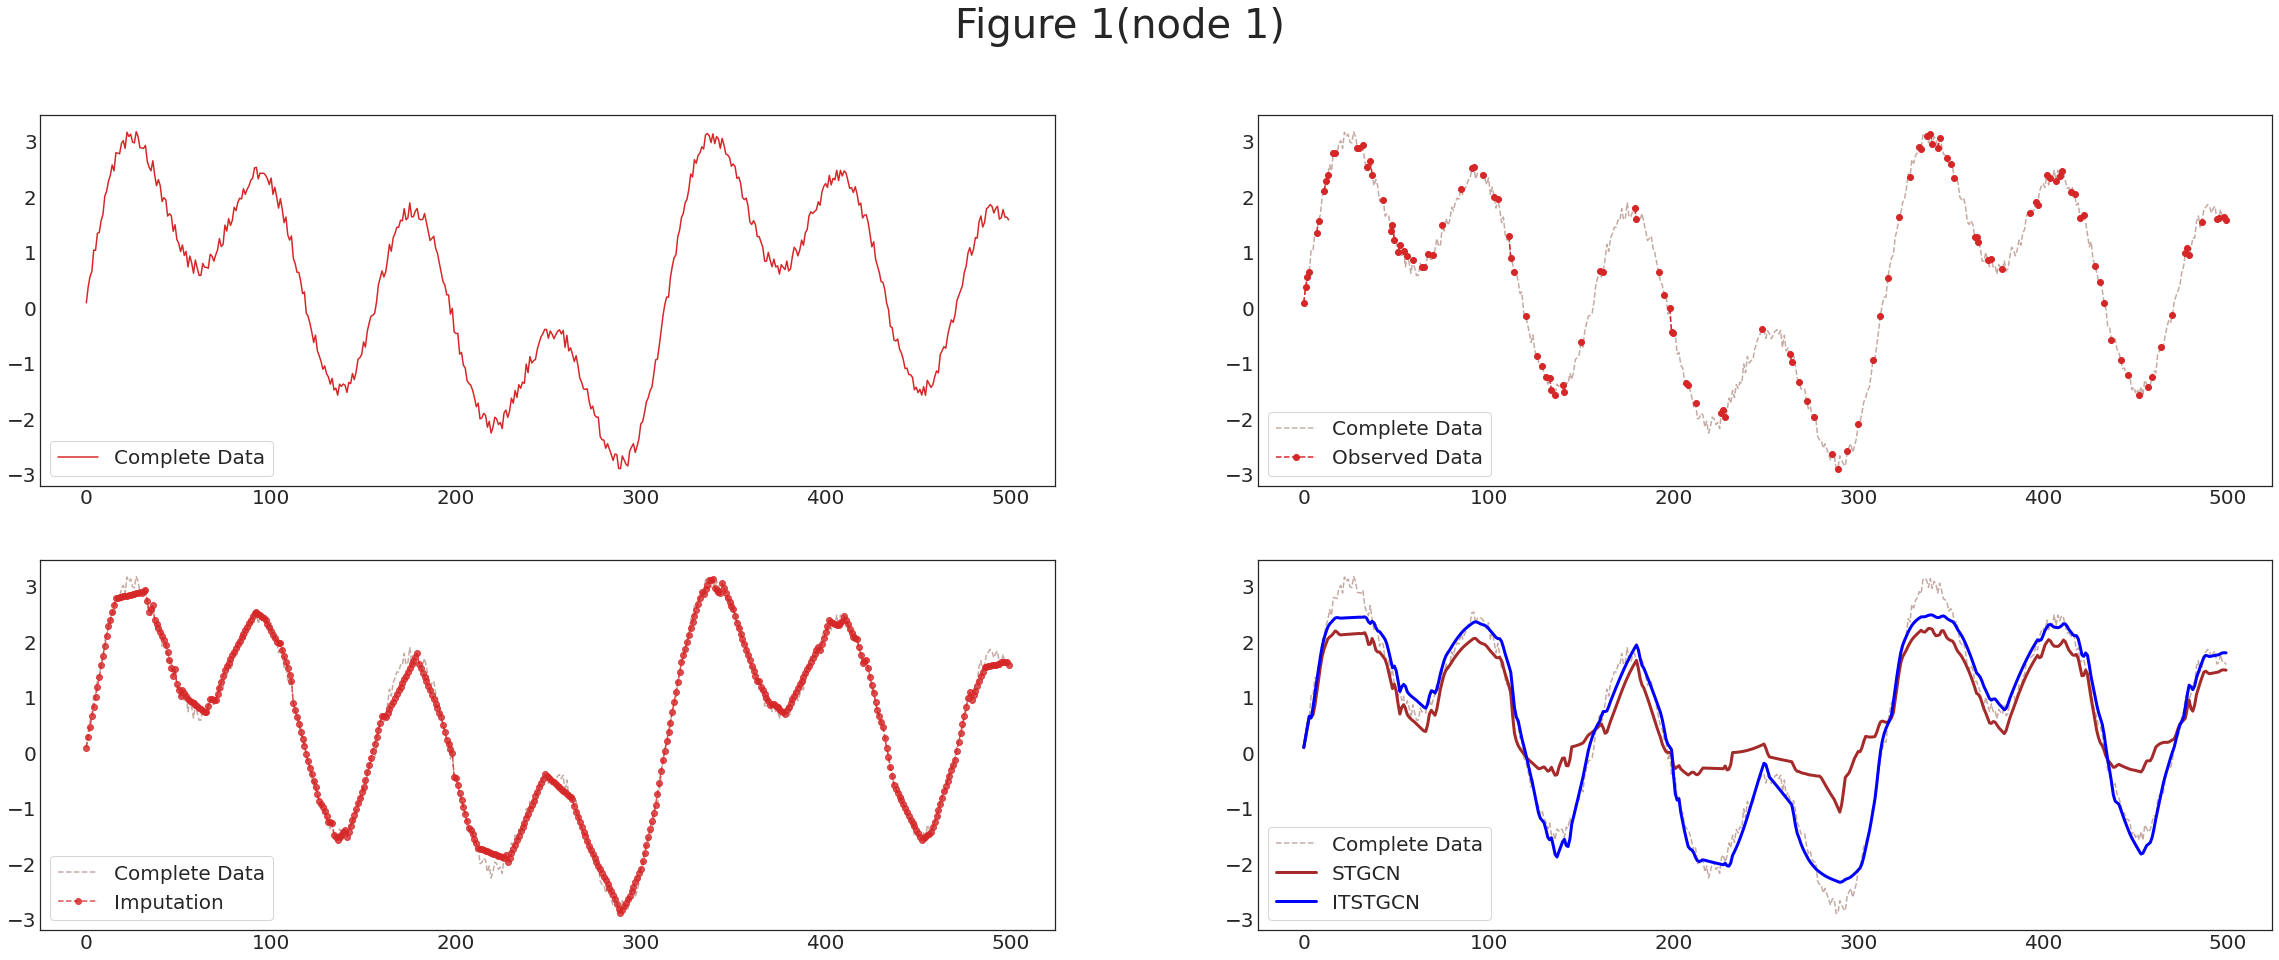

In [3366]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try5_node1_noise30.png')

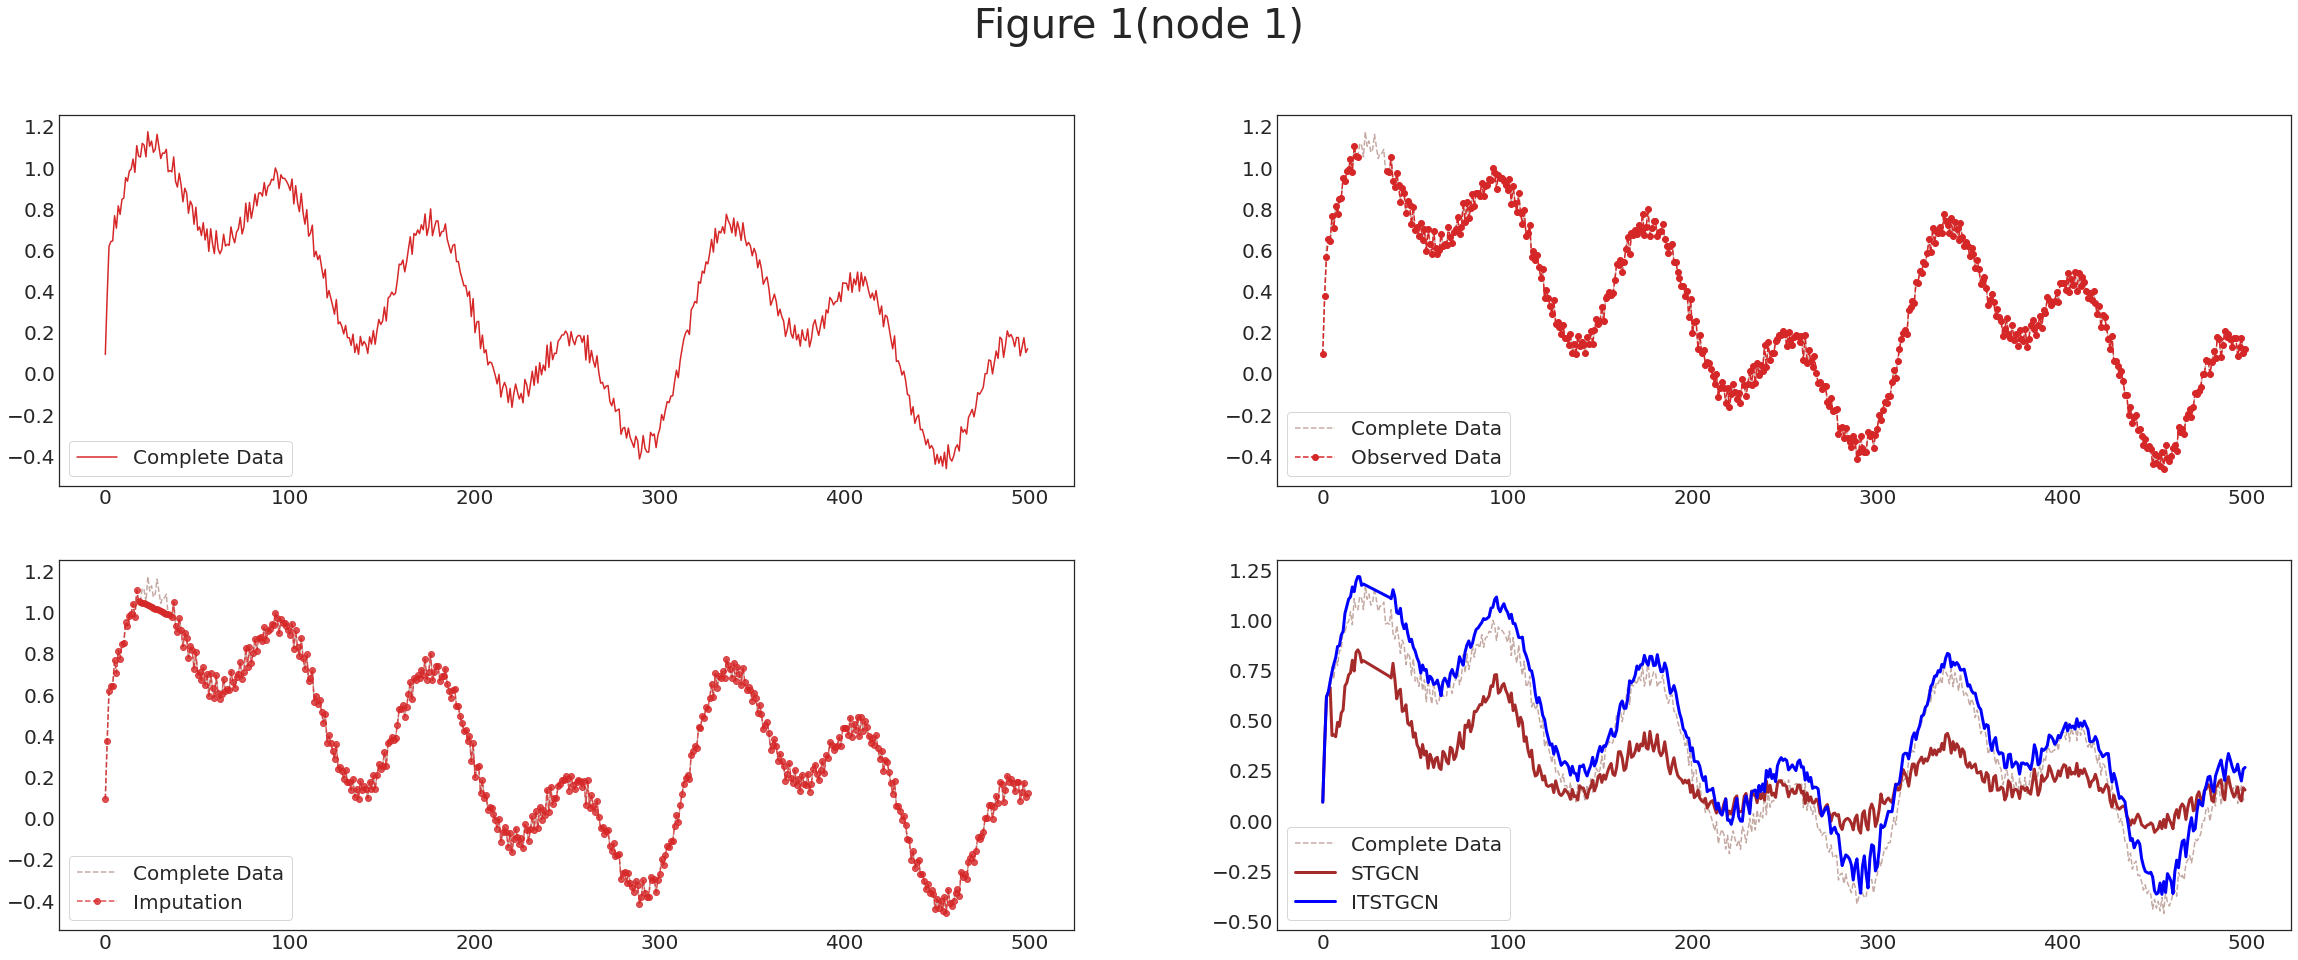

In [3368]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try5_node2_noise20.png')

# 시도 8 noise 30% only random

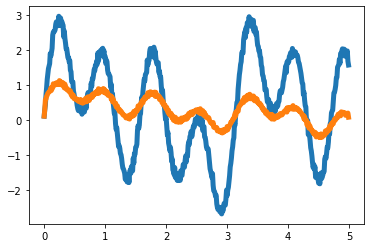

In [3561]:
T = 500
t = np.arange(T)/T * 5

x = 1*np.sin(2*t)+0.3*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

save_data(data1, './data/toy_example_true1.csv')


In [3562]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3563]:
dataset = loader1.get_dataset(lags=4)

In [3564]:
# mindex = [random.sample(range(0, T), int(T*0.7)),[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3565]:
mindex = itstgcn.rand_mindex(dataset,mrate=0.75)
dataset_miss = itstgcn.miss(dataset,mindex,mtype='rand')

In [3566]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3567]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3568]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3569]:
lrnr.learn(filters=8,epoch=5)

In [3570]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3571]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3572]:
lrnr_2.learn(filters=8,epoch=5)

In [3573]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

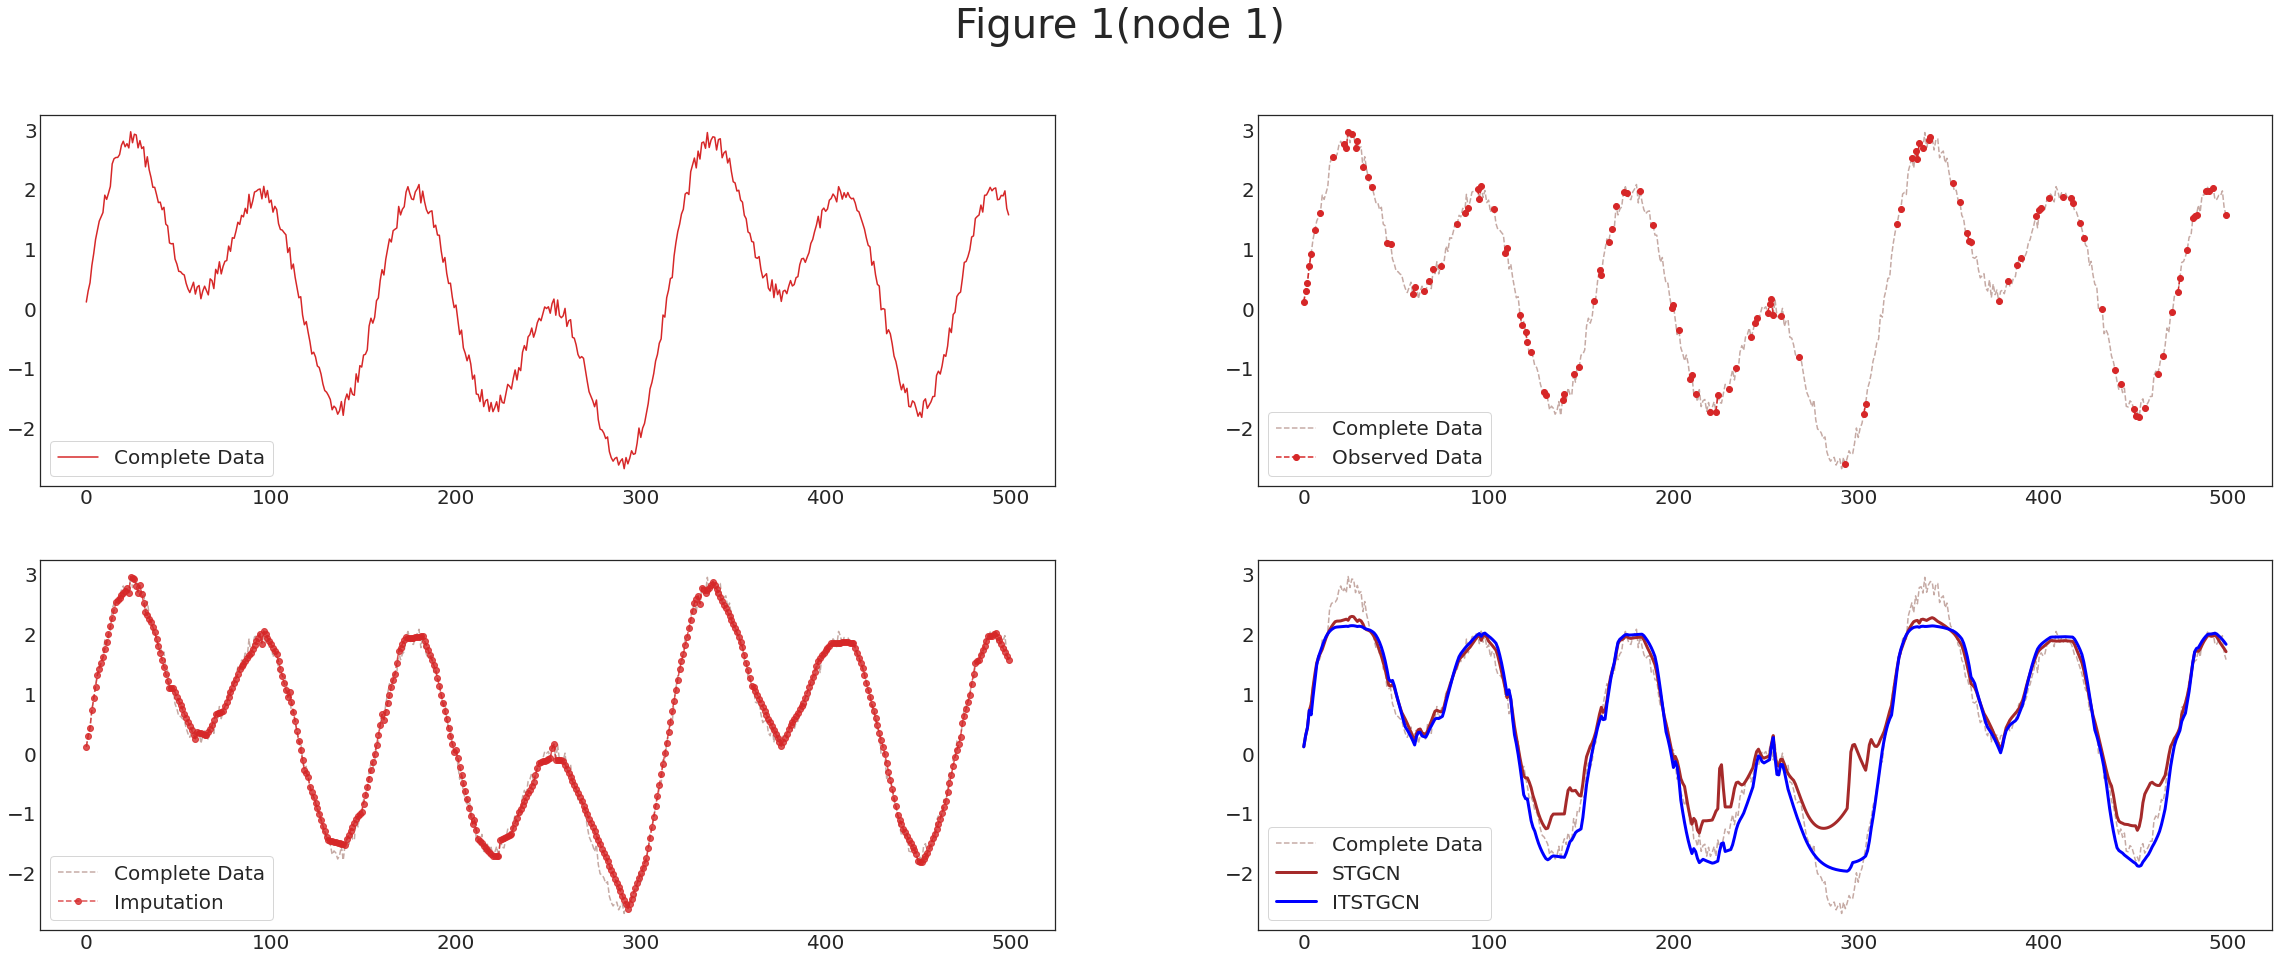

In [3574]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node1.png')

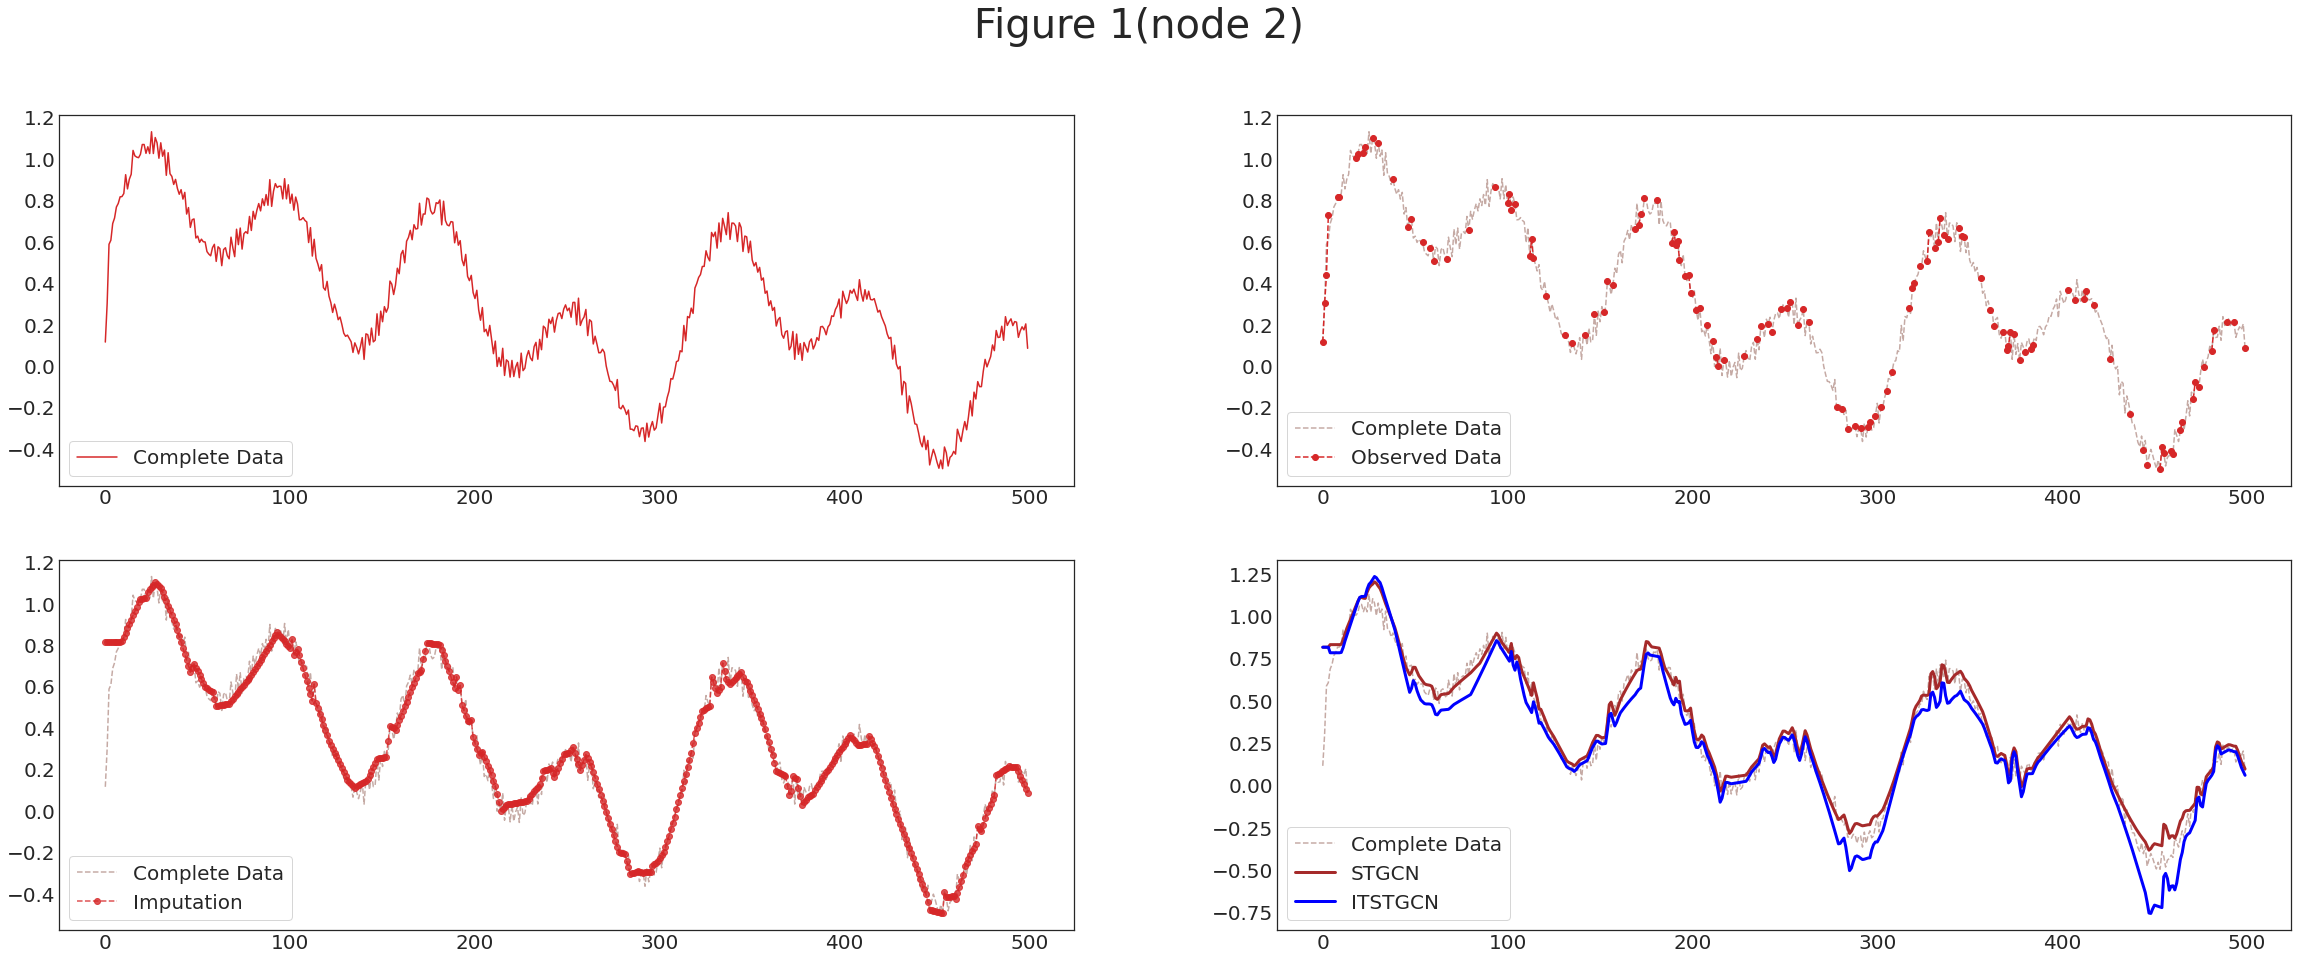

In [3575]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 2)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try2_node2.png')

# 시도 9 noise 40%

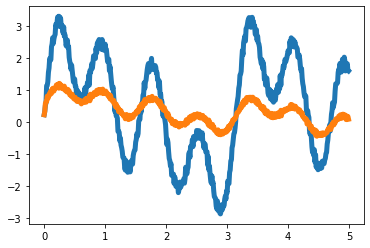

In [3611]:
T = 500
t = np.arange(T)/T * 5

x = 1.5*np.sin(2*t)+0.4*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [3612]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3613]:
dataset = loader1.get_dataset(lags=4)

In [3625]:
mindex = [[np.array(list(range(40,85)))],random.sample(range(0, T), int(T*0.7))]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3626]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3627]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3628]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3644]:
lrnr.learn(filters=32,epoch=5)

In [3645]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3646]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3647]:
lrnr_2.learn(filters=32,epoch=5)

In [3648]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

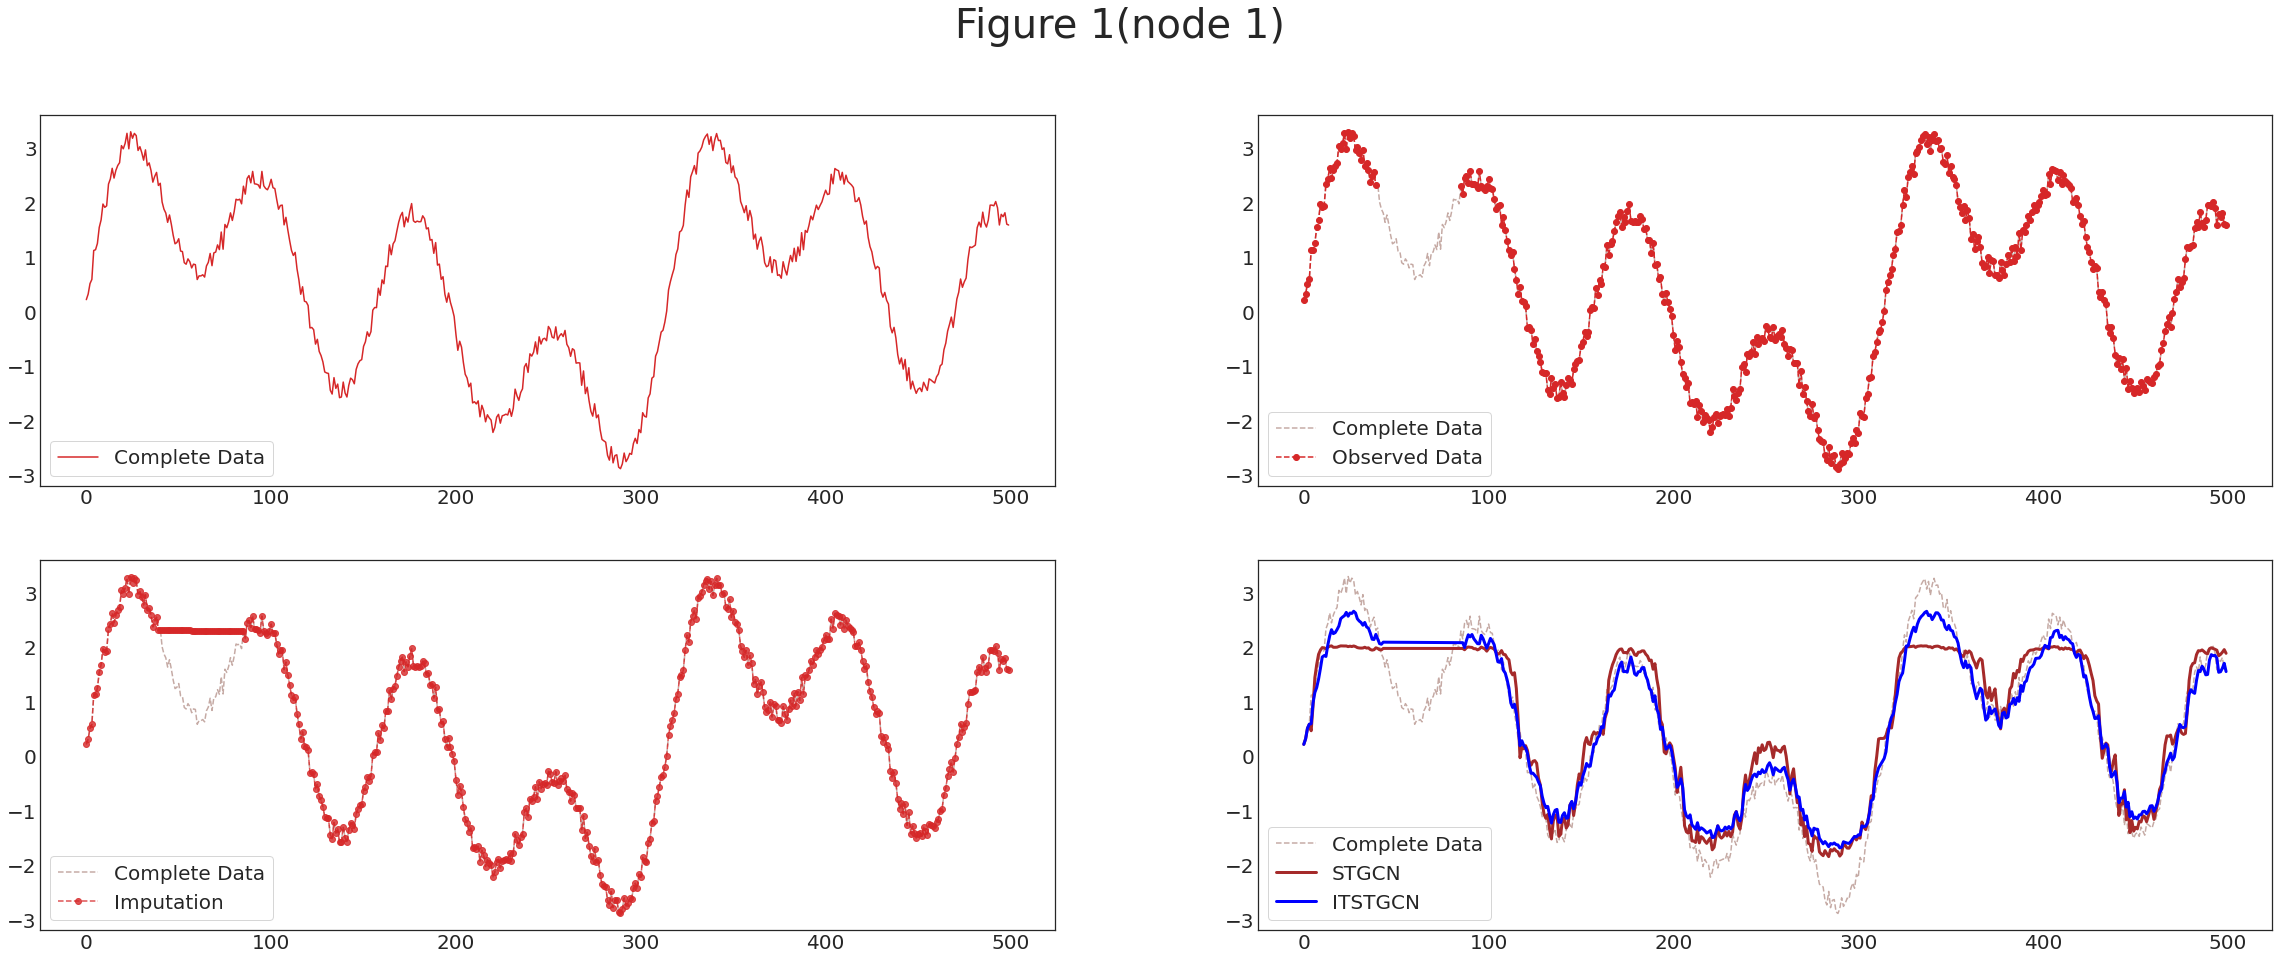

In [3649]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolation')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try6_node1_noise40.png')

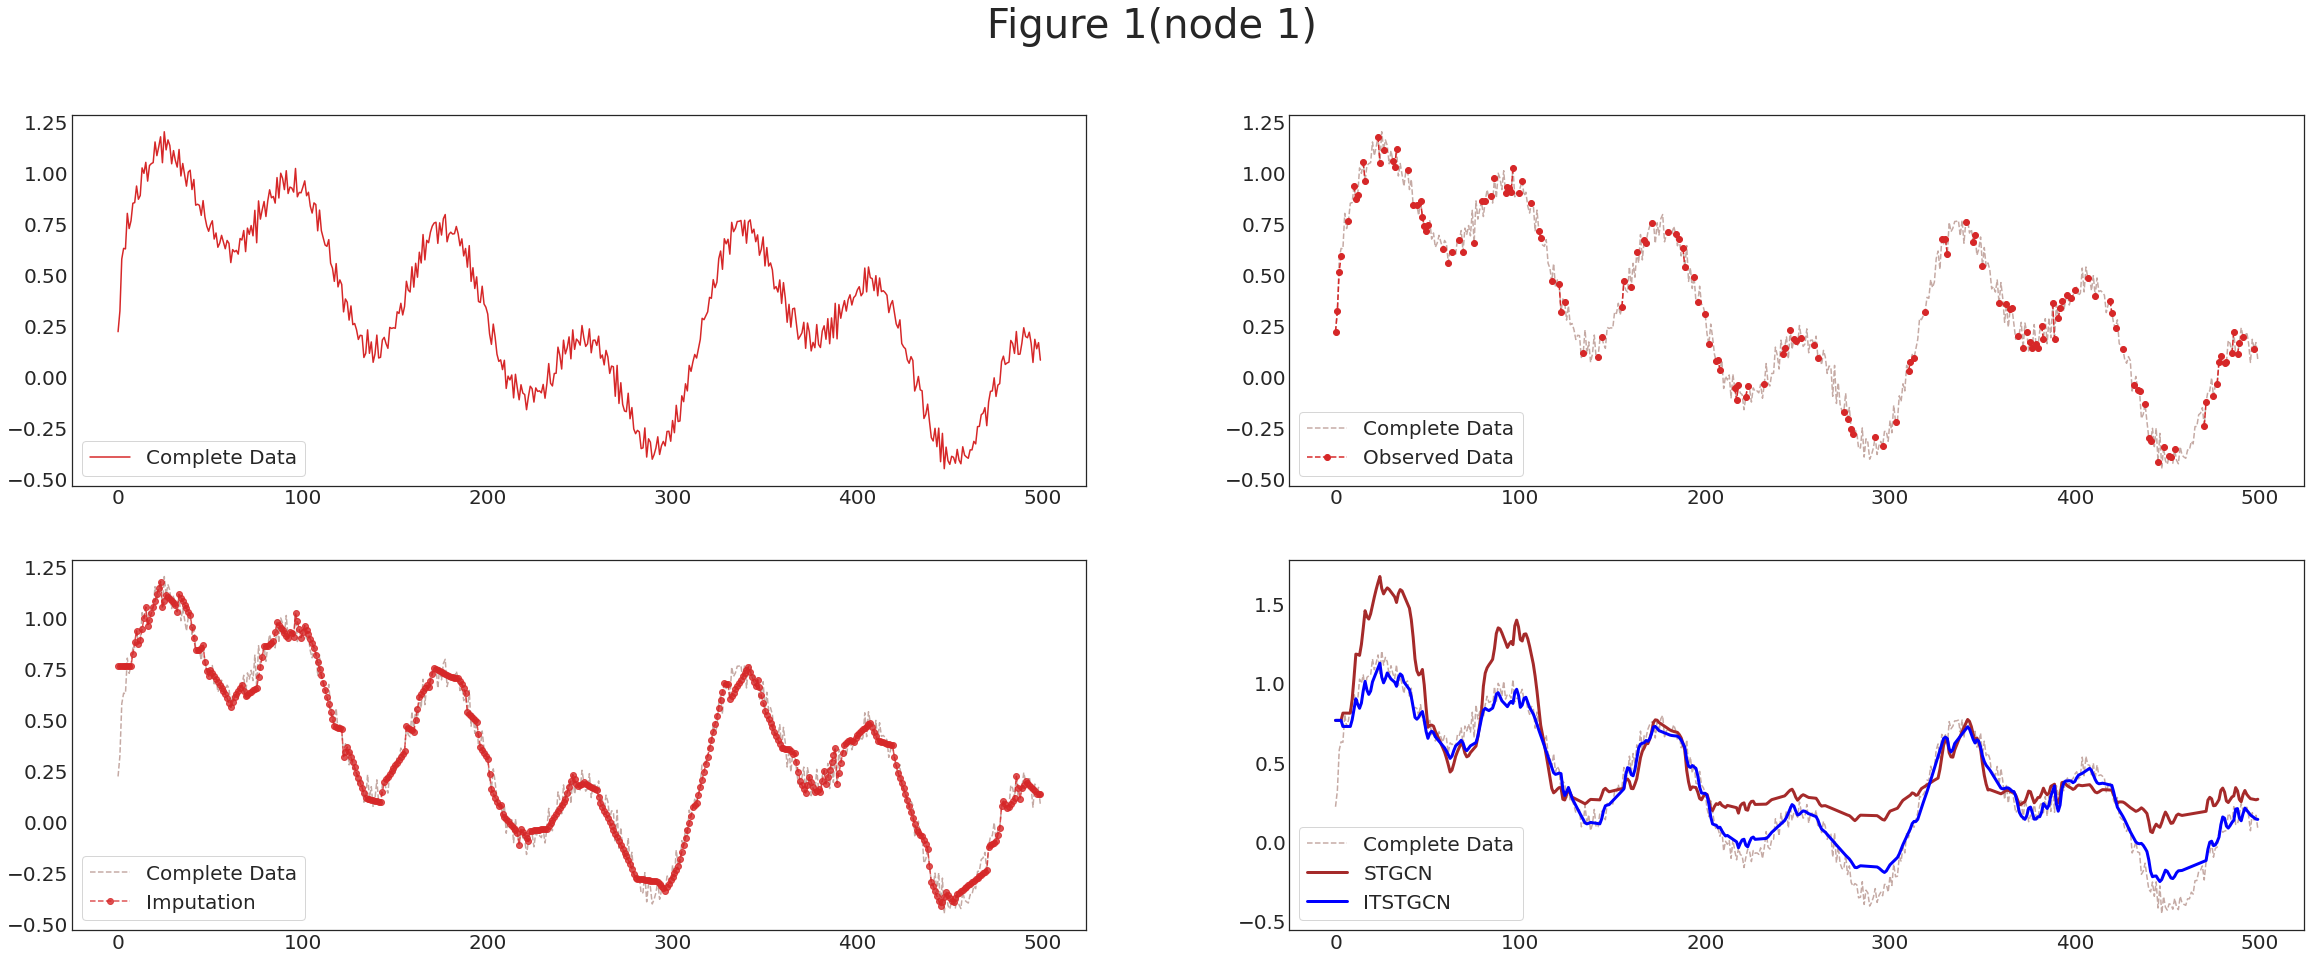

In [3650]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try6_node2_noise40.png')

# 시도 10 noise 50%

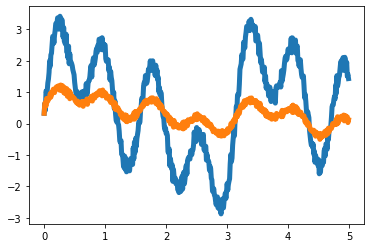

In [3588]:
T = 500
t = np.arange(T)/T * 5

x = 1.5*np.sin(2*t)+0.5*np.random.rand(T)+np.sin(4*t)+1.5*np.sin(8*t)
eps_x  = np.random.normal(size=T)*0
y = x.copy()
for i in range(2,T):
    y[i] = 0.35*x[i-1] - 0.15*x[i-2] + 0.5*np.cos(0.4*t[i]) 
eps_y  = np.random.normal(size=T)*0
x = x
y = y
plt.plot(t,x,color='C0',lw=5)
plt.plot(t,x+eps_x,alpha=0.5,color='C0')
plt.plot(t,y,color='C1',lw=5)
plt.plot(t,y+eps_y,alpha=0.5,color='C1')
_node_ids = {'node1':0, 'node2':1}

_FX1 = np.stack([x+eps_x,y+eps_y],axis=1).tolist()

_edges1 = torch.tensor([[0,1]]).tolist()

data_dict1 = {'edges':_edges1, 'node_ids':_node_ids, 'FX':_FX1}

# save_data(data_dict1, './data/toy_example1.pkl')

data1 = pd.DataFrame({'x':x,'y':y,'xer':x,'yer':y})

# save_data(data1, './data/toy_example_true1.csv')


In [3589]:
loader1 = itstgcn.DatasetLoader(data_dict1)

In [3590]:
dataset = loader1.get_dataset(lags=4)

In [3591]:
mindex = [random.sample(range(0, T), int(T*0.7)),[np.array(list(range(40,85)))]]
dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3592]:
# mindex = [[np.array(list(range(181,300)))],[np.array(list(range(20,35)))]]
# dataset_miss = itstgcn.miss(dataset,mindex,mtype='block')

In [3593]:
dataset_padded = itstgcn.padding(dataset_miss,interpolation_method='linear')

In [3594]:
lrnr = itstgcn.StgcnLearner(dataset_padded)

In [3602]:
lrnr.learn(filters=12,epoch=5)

In [3603]:
evtor = Eval_csy(lrnr,dataset_padded)

In [3604]:
lrnr_2 = itstgcn.ITStgcnLearner(dataset_padded)

In [3605]:
lrnr_2.learn(filters=12,epoch=5)

In [3606]:
evtor_2 = Eval_csy(lrnr_2,dataset_padded)

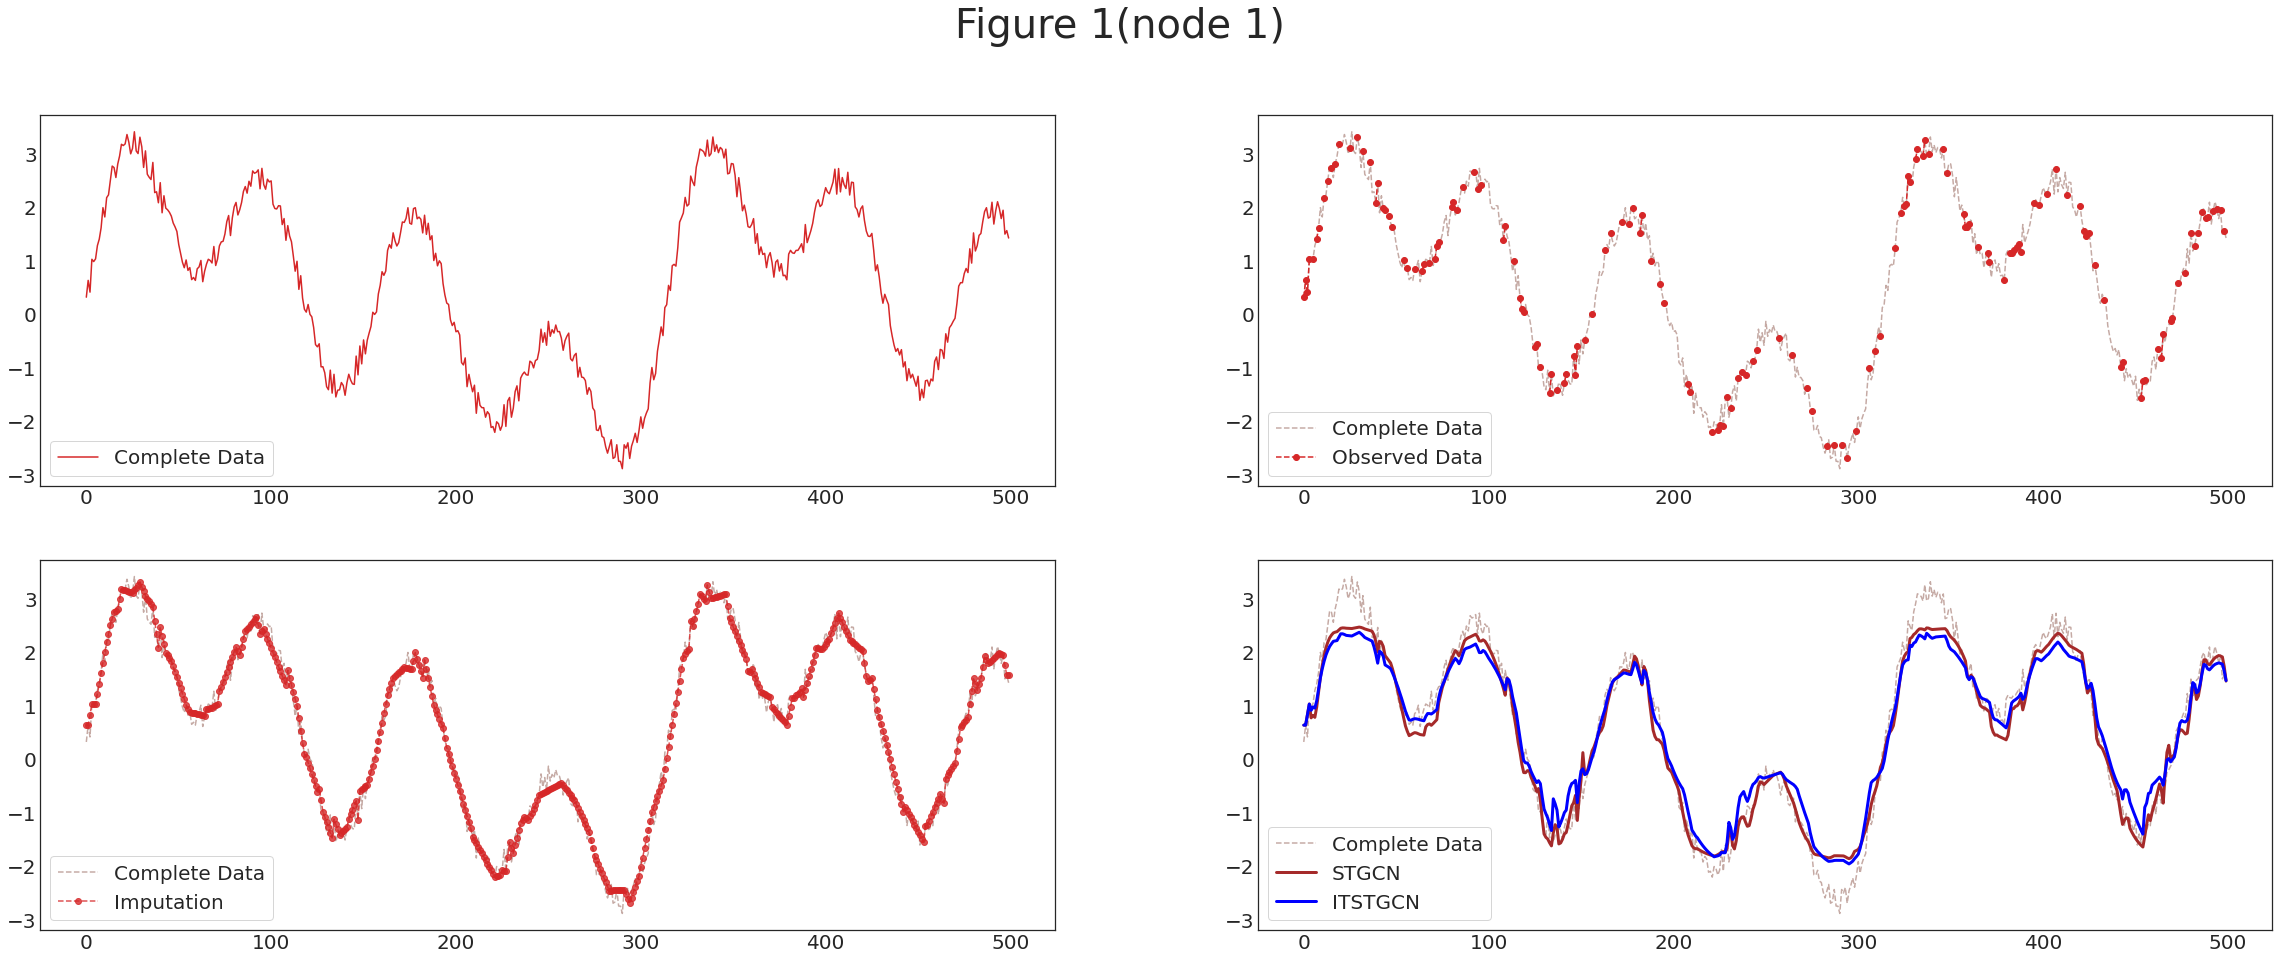

In [3607]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['x'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,0],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['x'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,0],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,0],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try6_node1_noise40.png')

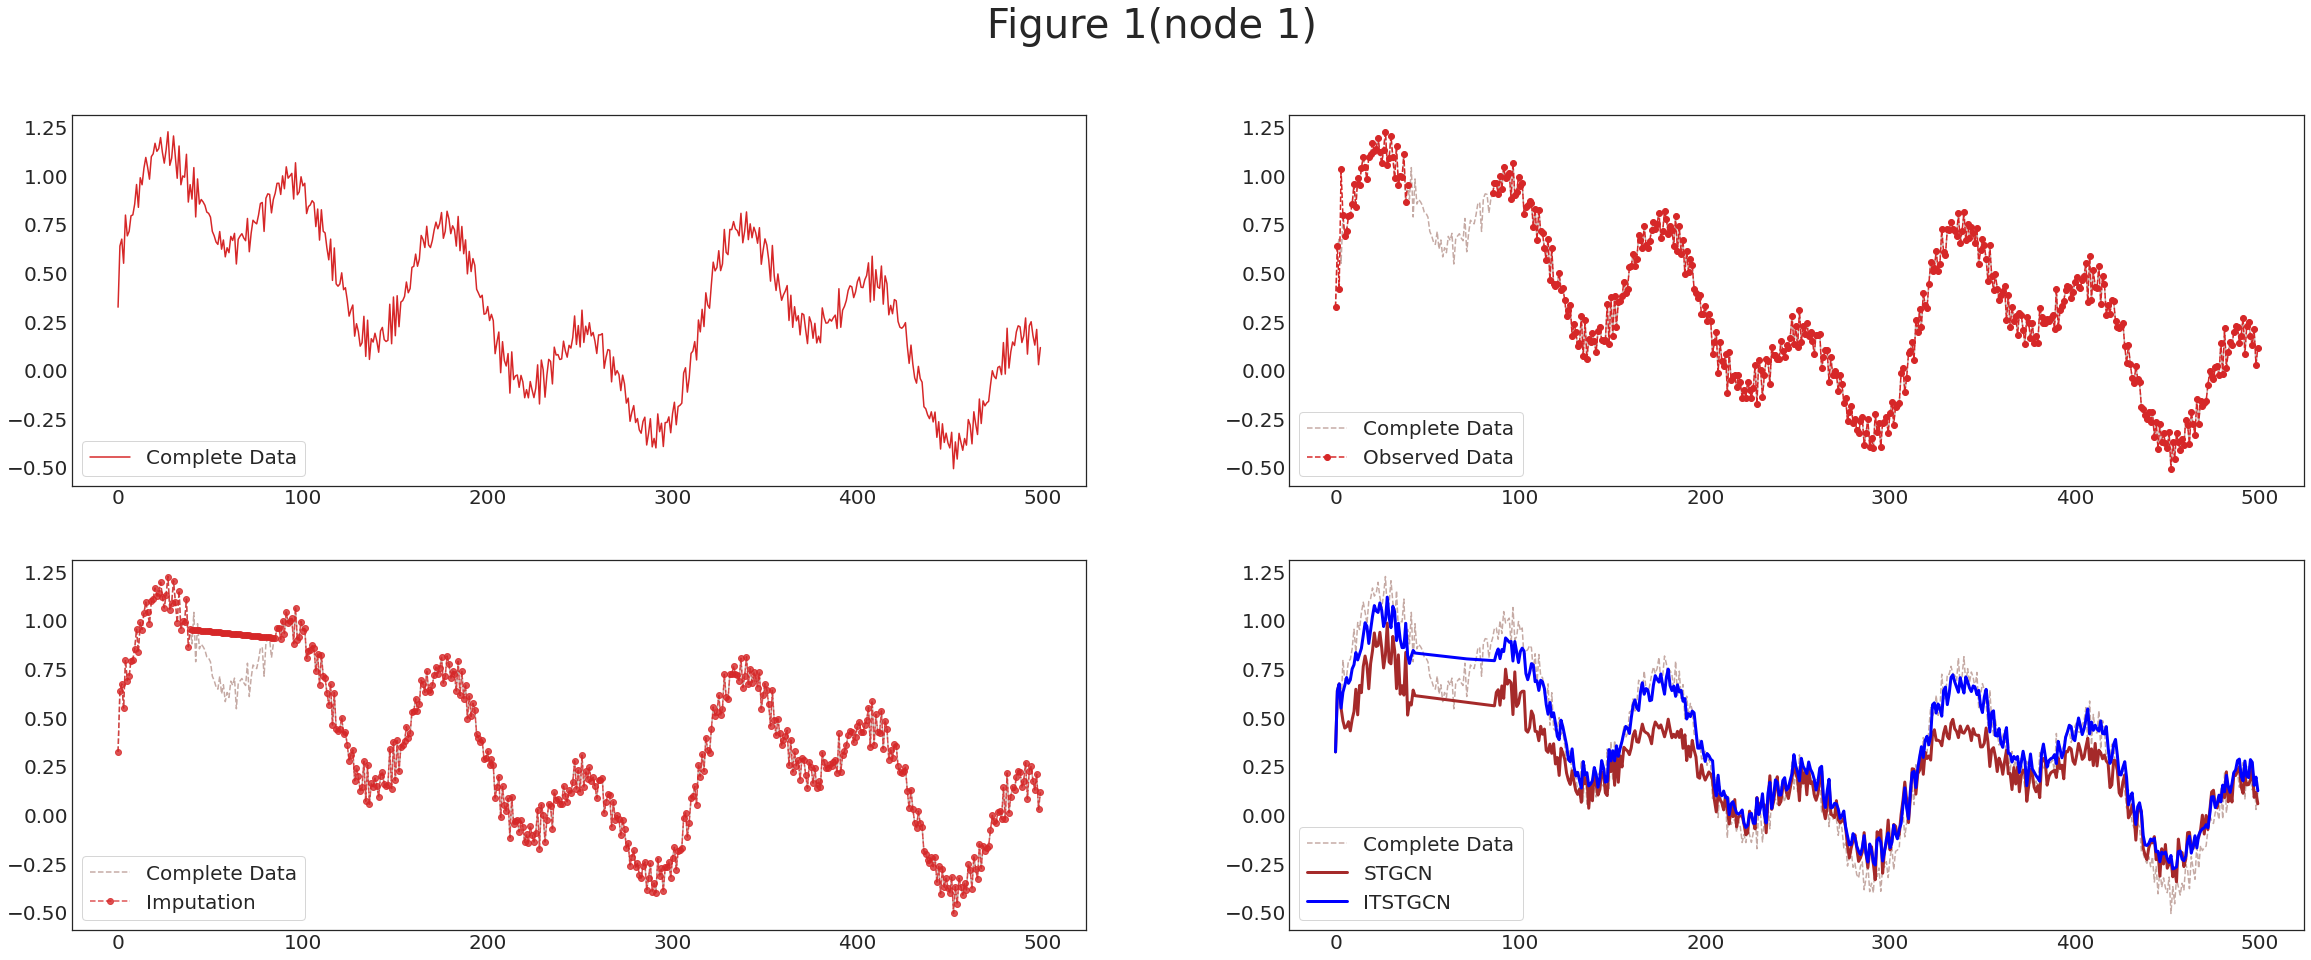

In [3608]:
with plt.style.context('seaborn-white'):
    # plt.rcParams['font.family'] = 'xkcd'
    # plt.xkcd(scale=0,length=200)
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(40,15))
    fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(data1['y'][:],'-',color='C3',label='Complete Data')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='x', labelsize=20)
    
    ax2.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax2.plot(torch.cat([torch.tensor(data1['x'][:4]),torch.tensor(dataset_miss.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(evtor_2.f_tr[:,1],'--o',color='C3',alpha=0.8,label='Interpolarion')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(data1['y'][:],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(evtor.fhat_tr[:,1],color='brown',lw=3,label='STGCN')
    ax4.plot(evtor_2.fhat_tr[:,1],color='blue',lw=3,label='ITSTGCN')
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
# plt.savefig('try6_node2_noise40.png')